In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'xsec_comparsion_generators_2D/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.18/04


In [2]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [3]:
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_comparison_generators_2D.root","RECREATE");


In [4]:
def draw_adding():
    pot_data = 7.644e18
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/20.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [5]:
pot_data =    7.644e+18  # best with tor875
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [6]:
from array import array
#mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
#mom_bins = [ 0.00, 0.225, 0.28, 0.33, 0.39, 0.52, 0.78, 1.21, 2.5]

mom_bins = {}
#mom_bins.Append()
mom_bins[0] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[1] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[2] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[3] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[4] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[5] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[6] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[7] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[8] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]

theta_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]

len_theta = len(theta_bins) - 1
len_mom = {}
sum_bins = 0
for i in range(len_theta):
    len_mom[i] = len(mom_bins[i]) - 1
    #print len_mom[i]
    sum_bins+=len_mom[i]

#print len_mom
#print sum(len_mom), sum_bins

#num_entries = 20000000

In [7]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


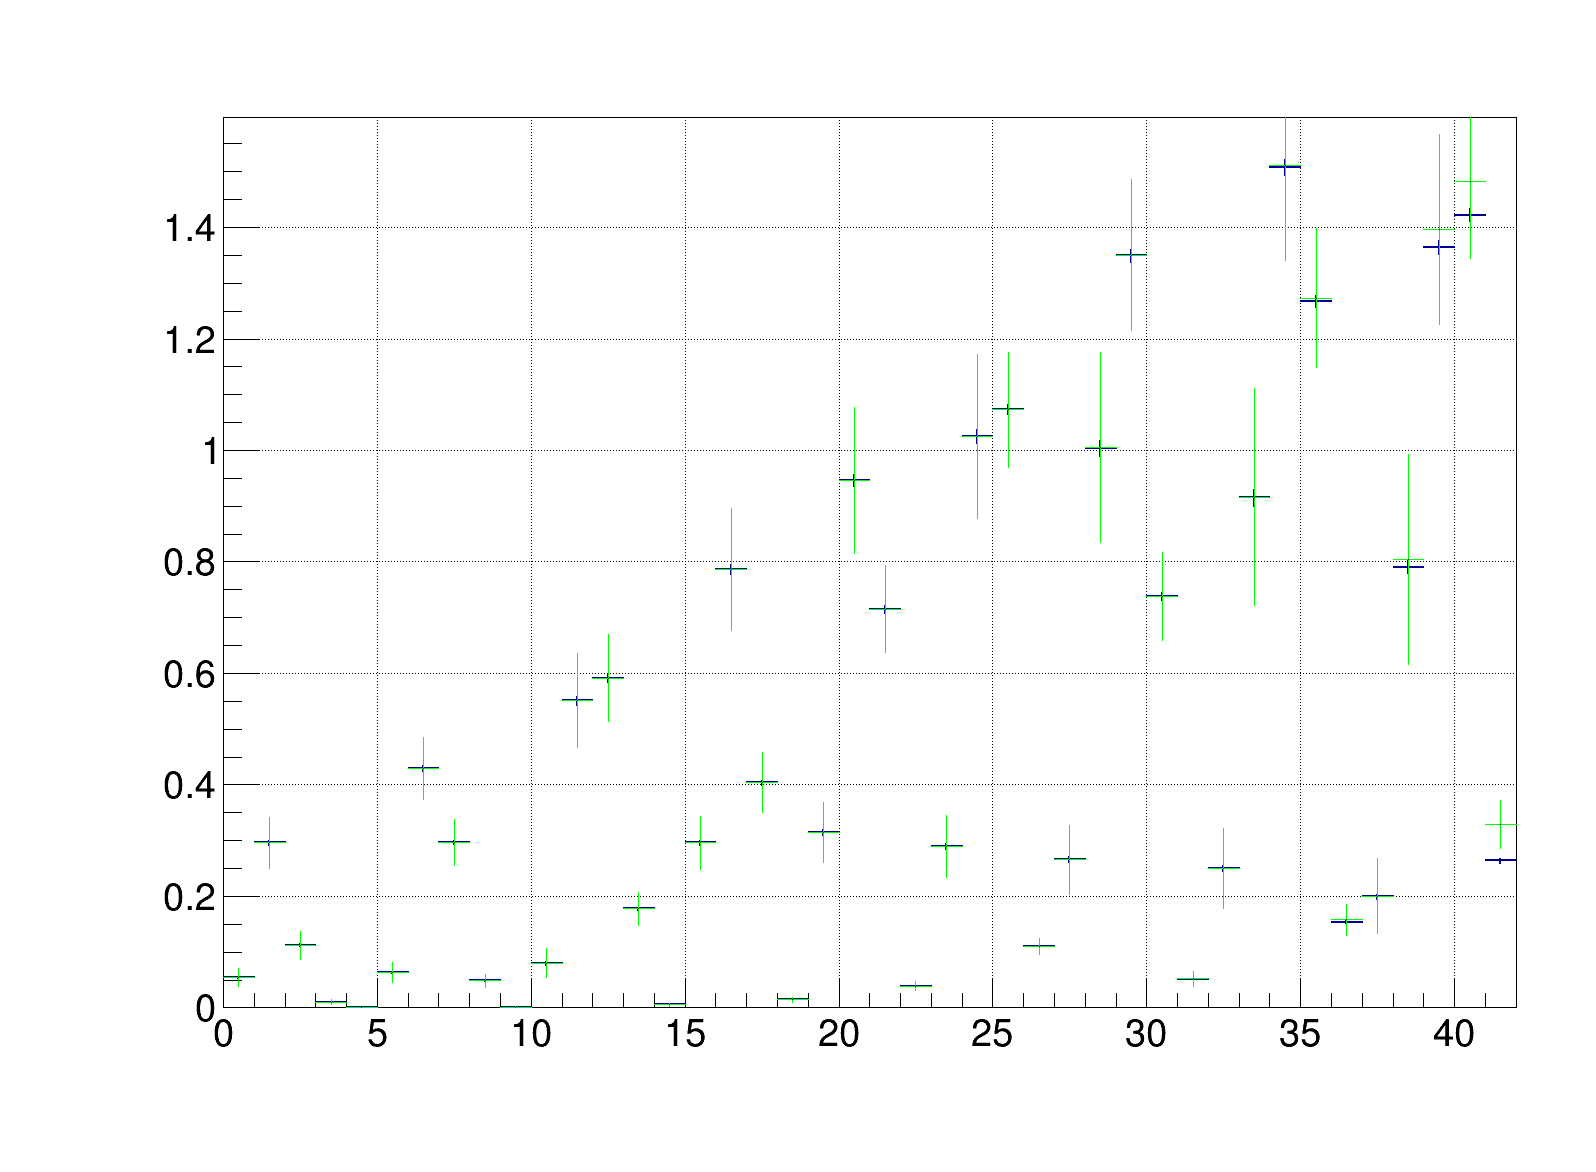

In [8]:
path_cv = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
path = '/home/tmettler/Share/data_hist/'
f_res = ROOT.TFile.Open(path_cv+"xsec_2D_result.root", 'read')
f_cv = ROOT.TFile.Open(path_cv+"xsec_2D_wighted.root", 'read')

f_g2 = ROOT.TFile.Open(path+"ccinc_2d_genie2.root", 'read')
f_g3 = ROOT.TFile.Open(path+"ccinc_2d_genie2.root", 'read')
f_gibuu = ROOT.TFile.Open(path+"ccinc_2d_gibuu.root", 'read')
f_nuwro = ROOT.TFile.Open(path+"ccinc_2d_nuwro.root", 'read')
f_neut = ROOT.TFile.Open(path+"ccinc_2d_neut.root", 'read')


h_signal = f_cv.Get('xsec_signal')
h_true = f_cv.Get('xsec_true')
h_true_smear = f_cv.Get('xsec_true_smear')
h_true_noweight = f_cv.Get('xsec_true_noweight')
h_true_noweight_smear = f_cv.Get('xsec_true_noweight_smear')

#h_smearing_matrix = f_cv.Get('h_smearing')
h_smearing_matrix = f_res.Get('smearing_matrix')

mitigation_matrix = np.zeros((sum_bins+1,sum_bins+1))
for i in range(1,sum_bins+1):
    for j in range(1,sum_bins+1):
        mitigation_matrix[i-1,j-1]= h_smearing_matrix.GetBinContent(i,j)

h_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC')
h_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC')
h_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC')
h_neut = f_neut.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC')
h_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC')

#h_g3_smeare = f_g3.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
#h_g3_smeare = h_g3_true.Clone()

true_bins = np.zeros((sum_bins+1))
bin_widths = np.zeros((sum_bins+1))
bin_counter = 0
h_xsec = []
for t_bin in range(len_theta):
    h_xsec.append(f_cv.Get('h_xsec_data['+str(t_bin)+']')) 
    bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
    for m_bin in range(len_mom[t_bin]):
        bin_widths[bin_counter] = h_xsec[t_bin].GetBinWidth(m_bin+1)*bin_width_theta
        bin_counter+=1

for i in range(0,sum_bins+1):
    true_bins[i] = h_true.GetBinContent(i+1)*bin_widths[i]
true_bins_smeared = np.zeros((sum_bins+1))

true_bins_smeared = mitigation_matrix.dot(true_bins)

h_true_s = h_true.Clone()
for i in range(1,sum_bins+1):
    #print bin_widths[i-1]
    h_true_s.SetBinContent(i,true_bins_smeared[i-1]/bin_widths[i-1])


h_genie3 = f_g3.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_genie3.Scale(1e38)
#h_true_noweight_smear.Scale(1.0/(N_tot*beam_flux*1e-38))
h_true_s.SetLineWidth(2)
h_true_s.Draw()
h_true_smear.SetLineColor(ROOT.kGreen)
h_true_smear.Draw('same')
c1.Draw()


'\nlegend = ROOT.TLegend(0.45,0.35,0.95,0.9); #LEGEND RIGHT\nlegend.AddEntry(h_xsec_data,\'xsec data (forw. fold.)\',"f")\nlegend.AddEntry(h_mc,\'mc tune3 (forw. fold.)\',"f") #+\'/{:04.2f})\'.format(chi2_mc/6)\nlegend.AddEntry(h_mc_noTune,\'mc no tune (forw. fold.)\',"f")\nlegend.AddEntry(h_g2,\'genie v2 (smeared)\',"f")\nlegend.AddEntry(h_g3,\'genie v3 (smeared)\',"f")\nlegend.AddEntry(h_nuwro,\'nuwro (smeared)\',"f")\nlegend.AddEntry(h_gibuu,\'gibuu (smeared)\',"f")\nlegend.AddEntry(h_neut,\'neut (smeared)\',"f")\n#legend.AddEntry(h_neut,\'neut\',"f")\nlegend.Draw()\n\nc1.Draw()\nc1.SaveAs(outputdir_png + "h_xsec_generators_nochi.png")\nc1.SaveAs(outputdir_root + "h_xsec_generators_nochi.root")\nc1.SaveAs(outputdir_pdf + "h_xsec_generators_nochi.pdf")\n'

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/png/h_xsec_generators.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/root/h_xsec_generators.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/pdf/h_xsec_generators.pdf has been created


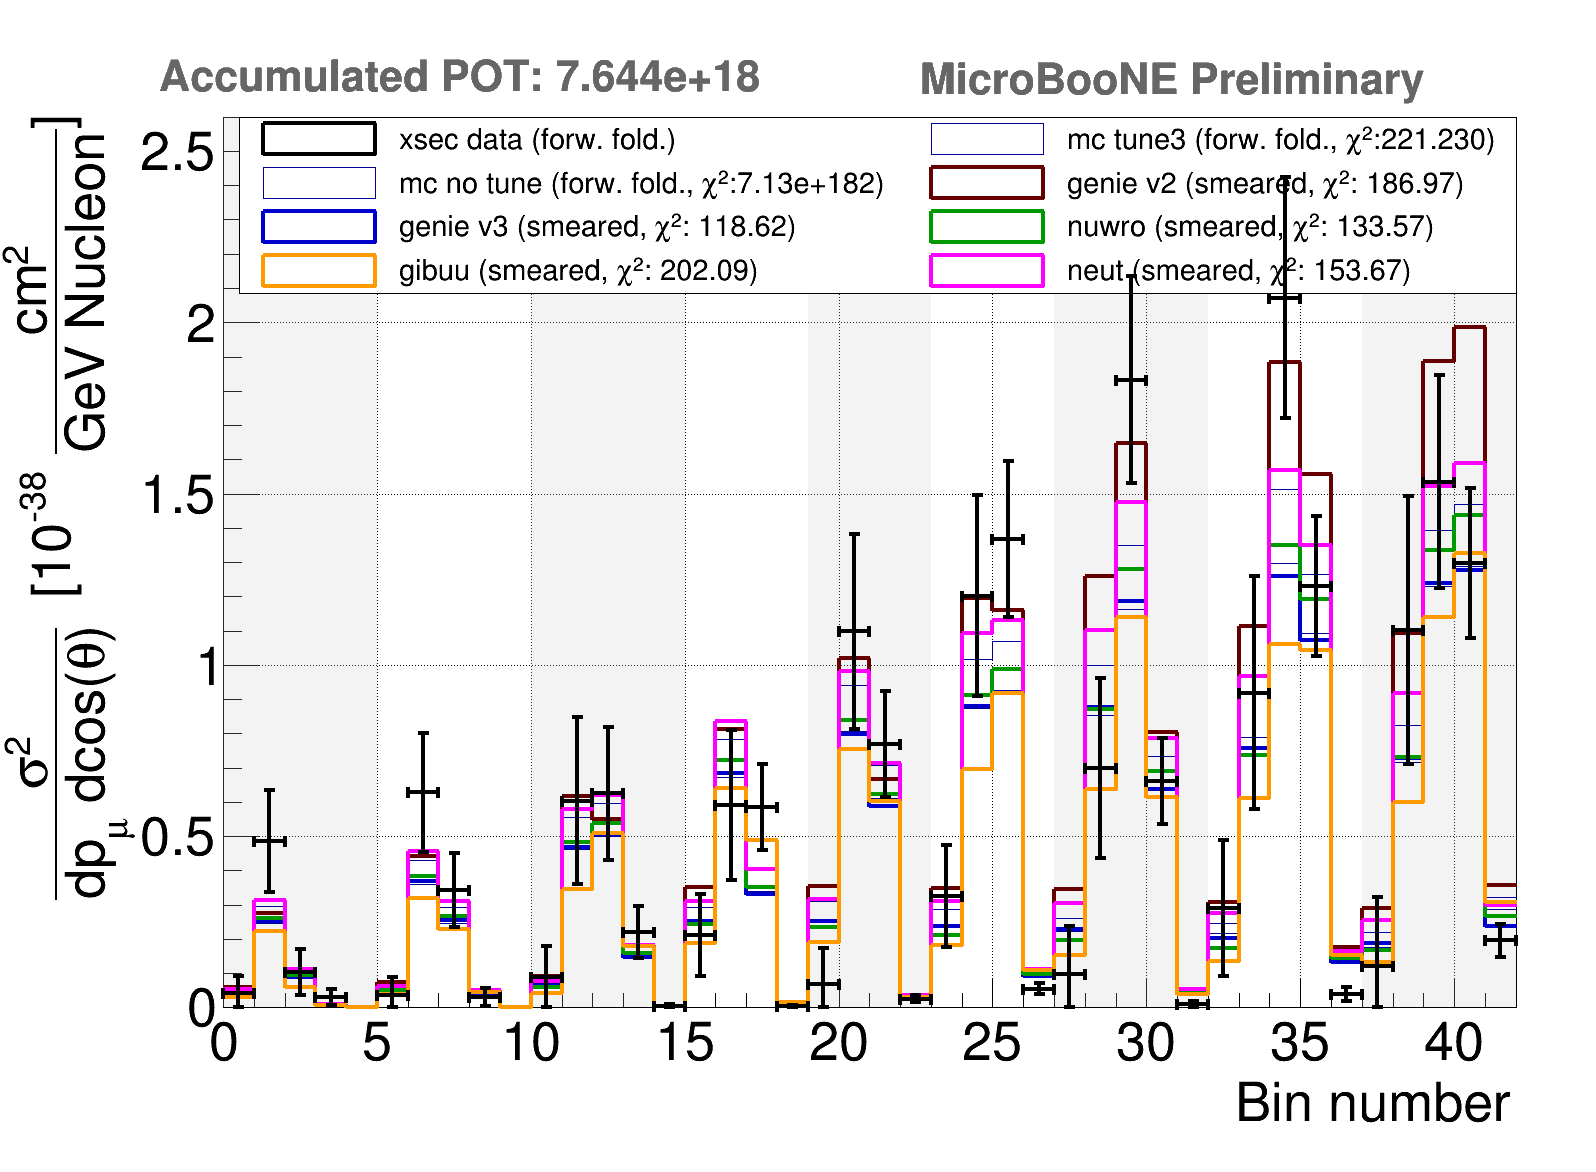

In [9]:
path_cv = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
path = '/home/tmettler/Share/data_hist/'
f_res = ROOT.TFile.Open(path_cv+"xsec_2D_result.root", 'read')
f_cv = ROOT.TFile.Open(path_cv+"xsec_2D_wighted.root", 'read')

f_g2 = ROOT.TFile.Open(path+"ccinc_2d_genie2.root", 'read')
f_g3 = ROOT.TFile.Open(path+"ccinc_2d_genie3.root", 'read')
f_gibuu = ROOT.TFile.Open(path+"ccinc_2d_gibuu.root", 'read')
f_nuwro = ROOT.TFile.Open(path+"ccinc_2d_nuwro.root", 'read')
f_neut = ROOT.TFile.Open(path+"ccinc_2d_neut.root", 'read')

h_xsec_data = f_res.Get('xsec_data')
#h_xsec_data.Scale(1e-38)
h_mc = f_cv.Get('xsec_signal')
h_mc.SetFillColor(0)
h_mc_noTune = f_cv.Get('xsec_true_noweight_smear')
h_mc_noTune.SetFillColor(0)
h_covariance_matrix = f_res.Get('covariance_matrix')
#h_smearing_matrix = f_cv.Get('h_smearing')

#res = np.zeros((9))
#chi2_nom =h_xsec_data.Chi2Test(h_mc,"WW P CHI2",res)
#chi2_nom =h_xsec_data.Chi2Test(h_mc_noTune,"WW P CHI2",res)


binnum = h_xsec_data.GetNbinsX()

h_xsec_data.GetYaxis().SetTitleSize(0.05)
h_xsec_data.GetYaxis().SetTitleOffset(0.0)
h_xsec_data.GetYaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleSize(0.05)
h_xsec_data.GetXaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleOffset(1)
h_xsec_data.SetLineColor(ROOT.kBlack)
h_xsec_data.SetLineWidth(4)
h_xsec_data.SetMinimum(0)
h_xsec_data.SetMaximum(2.6)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

#mitigation_matrix = np.zeros((sum_bins+1,sum_bins+1))
#for i in range(1,sum_bins+1):
#    for j in range(1,sum_bins+1):
#        mitigation_matrix[i-1,j-1]= h_smearing_matrix.GetBinContent(i,j)

h_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_neut = f_neut.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')

h_g3_true = f_g3.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
#h_g3_smeare = h_g3_true.Clone()

#true_bins = np.zeros((binnum+1))
#for i in range(0,binnum+1):
#    true_bins[i] = h_g3_true.GetBinContent(i+1)*h_g3_true.GetBinWidth(i+1)
#true_bins_smeared = np.zeros((binnum+1))

#true_bins_smeared = mitigation_matrix.dot(true_bins)
#sel_smeared = mitigation_matrix.dot(sel_smeared)


#for i in range(1,binnum+1):
#    h_g3_smeare.SetBinContent(i,true_bins_smeared[i-1]/h_g3_true.GetBinWidth(i))

h_g2.Scale(1e38)
h_g3.Scale(1e38)
h_nuwro.Scale(1e38)
h_gibuu.Scale(1e38)
h_neut.Scale(1e38)

h_nuwro.SetLineColor(ROOT.kGreen+2)
h_gibuu.SetLineColor(ROOT.kOrange-3)
h_g2.SetLineColor(ROOT.kRed+3)
h_g3.SetLineColor(ROOT.kBlue+1)
h_neut.SetLineColor(ROOT.kMagenta)

h_nuwro.SetLineWidth(4)
h_gibuu.SetLineWidth(4)
h_g2.SetLineWidth(4)
h_g3.SetLineWidth(4)
h_neut.SetLineWidth(4)

#h_g3_smeare.Scale(1e38)
#h_g3_smeare.SetLineColor(ROOT.kPink)
#h_g3_smeare.SetLineWidth(2)
h_bin_bkg = h_xsec_data.Clone()
bin_counter = 0
for t_bin in range(len_theta): #len_theta
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bin_bkg.SetBinContent(bin_counter,0)
            if t_bin%2==0:
                h_bin_bkg.SetBinContent(bin_counter,1000)
h_bin_bkg.SetLineWidth(0)
h_bin_bkg.SetFillColorAlpha(ROOT.kGray,0.2)


h_xsec_data.SetXTitle("Bin number")
h_xsec_data.SetYTitle('#frac{#sigma^{2}}{dp_{#mu} dcos(#theta)} \t [10^{-38} #frac{cm^{2}}{GeV Nucleon}]')


h_xsec_data.Draw('E1')
h_bin_bkg.Draw('same hist')
h_mc.Draw('same hist')
h_mc_noTune.Draw('same hist')

h_g2.Draw('same hist')
h_g3.Draw('same hist')
#h_g3_smeare.Draw('same hsit')
h_nuwro.Draw('same hist')
h_neut.Draw('same hist')
h_gibuu.Draw('same hist')

# calculate the chi2 for all these models..
#h_covariance_matrix
cov_matrix = np.zeros((sum_bins,sum_bins))
for i in range(1,sum_bins+1):
    for j in range(1,sum_bins+1):
        cov_matrix[i-1][j-1] = h_covariance_matrix.GetBinContent(i,j)+1e-80
        
#print cov_matrix

xsec_diff_mc = np.zeros((sum_bins))
xsec_diff_mc_noTune = np.zeros((sum_bins))

for i in range(1,sum_bins+1):
    #print h_xsec_data.GetBinContent(i), h_mc.GetBinContent(i)
    xsec_diff_mc[i-1] = (h_xsec_data.GetBinContent(i) - h_mc.GetBinContent(i) )#*1e-38
    xsec_diff_mc_noTune[i-1] = (h_xsec_data.GetBinContent(i) - h_mc_noTune.GetBinContent(i) )#*1e-38
    
cov_matrix_inv = np.linalg.inv(cov_matrix)

chi2_mc = np.dot(xsec_diff_mc,cov_matrix_inv)
chi2_mc = np.dot(chi2_mc,xsec_diff_mc)

chi2_mc_noTune = np.dot(xsec_diff_mc_noTune,cov_matrix_inv)
chi2_mc_noTune = np.dot(chi2_mc_noTune,xsec_diff_mc_noTune)


legend = ROOT.TLegend(0.15,0.75,0.95,0.9); #LEGEND RIGHT
legend.SetNColumns(2)
legend.AddEntry(h_xsec_data,'xsec data (forw. fold.)',"f")
legend.AddEntry(h_mc,'mc tune3 (forw. fold., #chi^{2}:'+'{:04.3f})'.format(chi2_mc),"f") #+'/{:04.2f})'.format(chi2_mc/6)
legend.AddEntry(h_mc_noTune,'mc no tune (forw. fold., #chi^{2}:'+'{:04.3g})'.format(chi2_mc_noTune),"f")
legend.AddEntry(h_g2,'genie v2 (smeared, #chi^{2}: '+h_g2.GetTitle()+')',"f")
legend.AddEntry(h_g3,'genie v3 (smeared, #chi^{2}: '+h_g3.GetTitle()+')',"f")
legend.AddEntry(h_nuwro,'nuwro (smeared, #chi^{2}: '+h_nuwro.GetTitle()+')',"f")
legend.AddEntry(h_gibuu,'gibuu (smeared, #chi^{2}: '+h_gibuu.GetTitle()+')',"f")
legend.AddEntry(h_neut,'neut (smeared, #chi^{2}: '+h_neut.GetTitle()+')',"f")
#legend.AddEntry(h_neut,'neut',"f")
legend.Draw()
h_xsec_data.Draw('E1 same')


prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_generators.png")
c1.SaveAs(outputdir_root + "h_xsec_generators.root")
c1.SaveAs(outputdir_pdf + "h_xsec_generators.pdf")
'''
legend = ROOT.TLegend(0.45,0.35,0.95,0.9); #LEGEND RIGHT
legend.AddEntry(h_xsec_data,'xsec data (forw. fold.)',"f")
legend.AddEntry(h_mc,'mc tune3 (forw. fold.)',"f") #+'/{:04.2f})'.format(chi2_mc/6)
legend.AddEntry(h_mc_noTune,'mc no tune (forw. fold.)',"f")
legend.AddEntry(h_g2,'genie v2 (smeared)',"f")
legend.AddEntry(h_g3,'genie v3 (smeared)',"f")
legend.AddEntry(h_nuwro,'nuwro (smeared)',"f")
legend.AddEntry(h_gibuu,'gibuu (smeared)',"f")
legend.AddEntry(h_neut,'neut (smeared)',"f")
#legend.AddEntry(h_neut,'neut',"f")
legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_generators_nochi.png")
c1.SaveAs(outputdir_root + "h_xsec_generators_nochi.root")
c1.SaveAs(outputdir_pdf + "h_xsec_generators_nochi.pdf")
'''

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/png/h_xsec_corr_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/root/h_xsec_corr_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/pdf/h_xsec_corr_ratio.pdf has been created


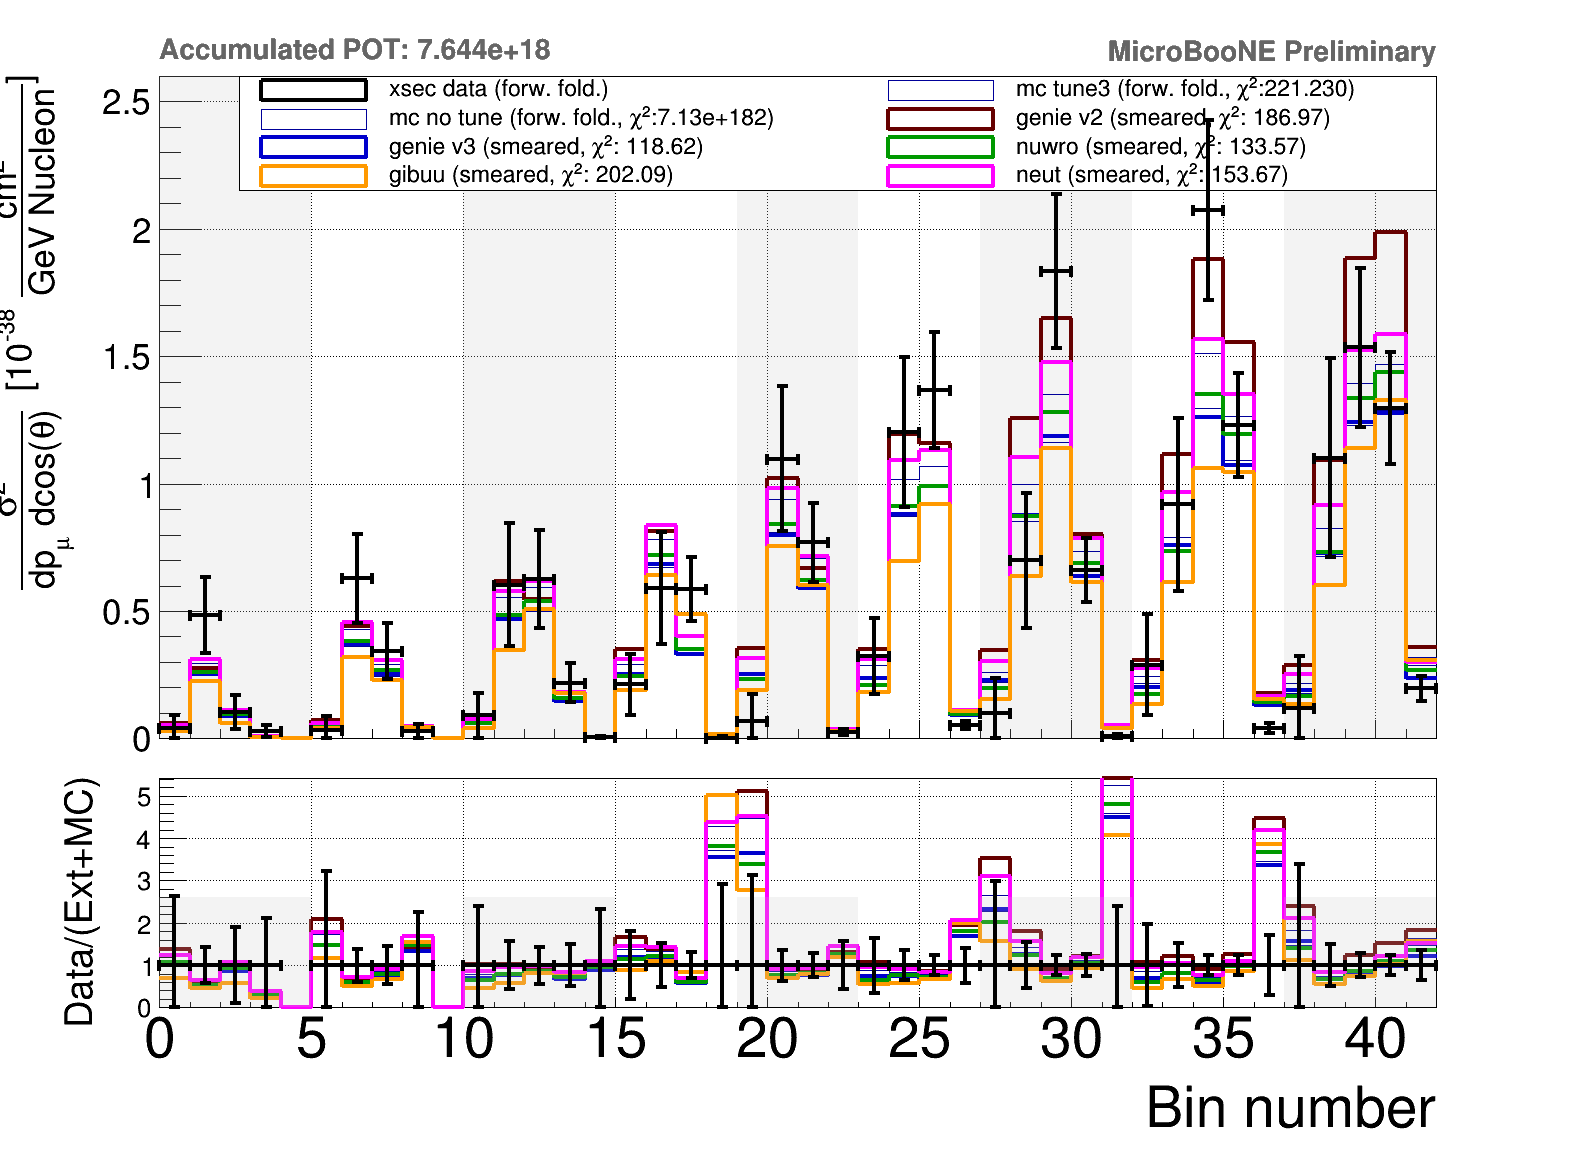

In [10]:

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

f_g2 = ROOT.TFile.Open(path+"ccinc_2d_genie2.root", 'read')
f_g3 = ROOT.TFile.Open(path+"ccinc_2d_genie3.root", 'read')
f_gibuu = ROOT.TFile.Open(path+"ccinc_2d_gibuu.root", 'read')
f_nuwro = ROOT.TFile.Open(path+"ccinc_2d_nuwro.root", 'read')
f_neut = ROOT.TFile.Open(path+"ccinc_2d_neut.root", 'read')

h_xsec_data = f_res.Get('xsec_data')
#h_xsec_data.Scale(1e-38)
h_mc = f_cv.Get('xsec_signal')
h_mc.SetFillColor(0)
h_mc_noTune = f_cv.Get('xsec_true_noweight_smear')
h_mc_noTune.SetFillColor(0)
h_covariance_matrix = f_res.Get('covariance_matrix')
#h_smearing_matrix = f_cv.Get('h_smearing')

#res = np.zeros((9))
#chi2_nom =h_xsec_data.Chi2Test(h_mc,"WW P CHI2",res)
#chi2_nom =h_xsec_data.Chi2Test(h_mc_noTune,"WW P CHI2",res)


binnum = h_xsec_data.GetNbinsX()

h_xsec_data.GetYaxis().SetTitleSize(0.05)
h_xsec_data.GetYaxis().SetTitleOffset(0.0)
h_xsec_data.GetYaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleSize(0.05)
h_xsec_data.GetXaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleOffset(1)
h_xsec_data.SetLineColor(ROOT.kBlack)
h_xsec_data.SetLineWidth(4)
h_xsec_data.SetMinimum(0)
h_xsec_data.SetMaximum(2.6)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

#mitigation_matrix = np.zeros((sum_bins+1,sum_bins+1))
#for i in range(1,sum_bins+1):
#    for j in range(1,sum_bins+1):
#        mitigation_matrix[i-1,j-1]= h_smearing_matrix.GetBinContent(i,j)

h_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_neut = f_neut.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')

h_g3_true = f_g3.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
#h_g3_smeare = h_g3_true.Clone()

#true_bins = np.zeros((binnum+1))
#for i in range(0,binnum+1):
#    true_bins[i] = h_g3_true.GetBinContent(i+1)*h_g3_true.GetBinWidth(i+1)
#true_bins_smeared = np.zeros((binnum+1))

#true_bins_smeared = mitigation_matrix.dot(true_bins)
#sel_smeared = mitigation_matrix.dot(sel_smeared)


#for i in range(1,binnum+1):
#    h_g3_smeare.SetBinContent(i,true_bins_smeared[i-1]/h_g3_true.GetBinWidth(i))

h_g2.Scale(1e38)
h_g3.Scale(1e38)
h_nuwro.Scale(1e38)
h_gibuu.Scale(1e38)
h_neut.Scale(1e38)

h_nuwro.SetLineColor(ROOT.kGreen+2)
h_gibuu.SetLineColor(ROOT.kOrange-3)
h_g2.SetLineColor(ROOT.kRed+3)
h_g3.SetLineColor(ROOT.kBlue+1)
h_neut.SetLineColor(ROOT.kMagenta)

h_nuwro.SetLineWidth(4)
h_gibuu.SetLineWidth(4)
h_g2.SetLineWidth(4)
h_g3.SetLineWidth(4)
h_neut.SetLineWidth(4)

#h_g3_smeare.Scale(1e38)
#h_g3_smeare.SetLineColor(ROOT.kPink)
#h_g3_smeare.SetLineWidth(2)
h_bin_bkg = h_xsec_data.Clone()
bin_counter = 0
for t_bin in range(len_theta): #len_theta
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bin_bkg.SetBinContent(bin_counter,0)
            if t_bin%2==0:
                h_bin_bkg.SetBinContent(bin_counter,1000)
h_bin_bkg.SetLineWidth(0)
h_bin_bkg.SetFillColorAlpha(ROOT.kGray,0.2)

h_xsec_data.SetXTitle("Bin number")
h_xsec_data.SetYTitle('#frac{#sigma^{2}}{dp_{#mu} dcos(#theta)} \t [10^{-38} #frac{cm^{2}}{GeV Nucleon}]')
    

h_xsec_data.Draw('E1')
h_bin_bkg.Draw('same hist')
h_mc.Draw('same hist')
h_mc_noTune.Draw('same hist')

h_g2.Draw('same hist')
h_g3.Draw('same hist')
#h_g3_smeare.Draw('same hsit')
h_nuwro.Draw('same hist')
h_neut.Draw('same hist')
h_gibuu.Draw('same hist')

# calculate the chi2 for all these models..
#h_covariance_matrix
cov_matrix = np.zeros((sum_bins,sum_bins))
for i in range(1,sum_bins+1):
    for j in range(1,sum_bins+1):
        cov_matrix[i-1][j-1] = h_covariance_matrix.GetBinContent(i,j)+1e-80
        
#print cov_matrix

xsec_diff_mc = np.zeros((sum_bins))
xsec_diff_mc_noTune = np.zeros((sum_bins))

for i in range(1,sum_bins+1):
    #print h_xsec_data.GetBinContent(i), h_mc.GetBinContent(i)
    xsec_diff_mc[i-1] = (h_xsec_data.GetBinContent(i) - h_mc.GetBinContent(i) )#*1e-38
    xsec_diff_mc_noTune[i-1] = (h_xsec_data.GetBinContent(i) - h_mc_noTune.GetBinContent(i) )#*1e-38
    
cov_matrix_inv = np.linalg.inv(cov_matrix)

chi2_mc = np.dot(xsec_diff_mc,cov_matrix_inv)
chi2_mc = np.dot(chi2_mc,xsec_diff_mc)

chi2_mc_noTune = np.dot(xsec_diff_mc_noTune,cov_matrix_inv)
chi2_mc_noTune = np.dot(chi2_mc_noTune,xsec_diff_mc_noTune)


legend = ROOT.TLegend(0.15,0.75,0.9,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_xsec_data,'xsec data (forw. fold.)',"f")
legend.AddEntry(h_mc,'mc tune3 (forw. fold., #chi^{2}:'+'{:04.3f})'.format(chi2_mc),"f") #+'/{:04.2f})'.format(chi2_mc/6)
legend.AddEntry(h_mc_noTune,'mc no tune (forw. fold., #chi^{2}:'+'{:04.3g})'.format(chi2_mc_noTune),"f")
legend.AddEntry(h_g2,'genie v2 (smeared, #chi^{2}: '+h_g2.GetTitle()+')',"f")
legend.AddEntry(h_g3,'genie v3 (smeared, #chi^{2}: '+h_g3.GetTitle()+')',"f")
legend.AddEntry(h_nuwro,'nuwro (smeared, #chi^{2}: '+h_nuwro.GetTitle()+')',"f")
legend.AddEntry(h_gibuu,'gibuu (smeared, #chi^{2}: '+h_gibuu.GetTitle()+')',"f")
legend.AddEntry(h_neut,'neut (smeared, #chi^{2}: '+h_neut.GetTitle()+')',"f")
#legend.AddEntry(h_neut,'neut',"f")
legend.Draw()
h_xsec_data.Draw('E1 same')


prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()

h_xsec_data.GetXaxis().SetLabelOffset(999);
h_xsec_data.GetXaxis().SetTitleOffset(999);
h_xsec_data.GetXaxis().SetLabelSize(0);
h_xsec_data.GetXaxis().SetTitleSize(0);

c1.cd()
h_xsec_data.GetXaxis().SetLabelOffset(0);
h_xsec_data.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()

h_xsec_data_ratio = h_xsec_data.Clone()
h_xsec_data_ratio.Divide(h_xsec_data)
h_mc_ratio = h_mc.Clone()
h_mc_ratio.Divide(h_xsec_data)
h_mc_noTune_ratio = h_mc_noTune.Clone()
h_mc_noTune_ratio.Divide(h_xsec_data)

h_g2_ratio = h_g2.Clone()
h_g2_ratio.Divide(h_xsec_data)
h_g3_ratio = h_g3.Clone()
h_g3_ratio.Divide(h_xsec_data)
h_nuwro_ratio = h_nuwro.Clone()
h_nuwro_ratio.Divide(h_xsec_data)
h_gibuu_ratio = h_gibuu.Clone()
h_gibuu_ratio.Divide(h_xsec_data)
h_neut_ratio = h_neut.Clone()
h_neut_ratio.Divide(h_xsec_data)

#h_xsec_data_ratio.SetMinimum(0)
#h_xsec_data_ratio.SetMaximum(3)
#h_overlay_sig_ratio.SetFillColor(0)
h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)

h_xsec_data_ratio.SetMaximum(h_g2_ratio.GetMaximum())
h_xsec_data_ratio.Draw('E1')
h_mc_ratio.Draw('hist same')
h_mc_noTune_ratio.Draw('same hist')
h_g2_ratio.Draw('same hist')
h_g3_ratio.Draw('hist same')
h_nuwro_ratio.Draw('hist same')
h_gibuu_ratio.Draw('hist same')
h_neut_ratio.Draw('hist same')
h_bin_bkg.Draw('same hist')

h_xsec_data_ratio.Draw('E1 same')



c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr_ratio.png")
c1.SaveAs(outputdir_root + "h_xsec_corr_ratio.root")
c1.SaveAs(outputdir_pdf + "h_xsec_corr_ratio.pdf")

#h_data.Write("h_xsec_data")
#h_overlay_sig.Write("h_xsec_MC")

In [11]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/png/h_xsec_generators_0.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/pdf/h_xsec_generators_0.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/png/h_xsec_generators_1.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/pdf/h_xsec_generators_1.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/png/h_xsec_generators_2.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsi

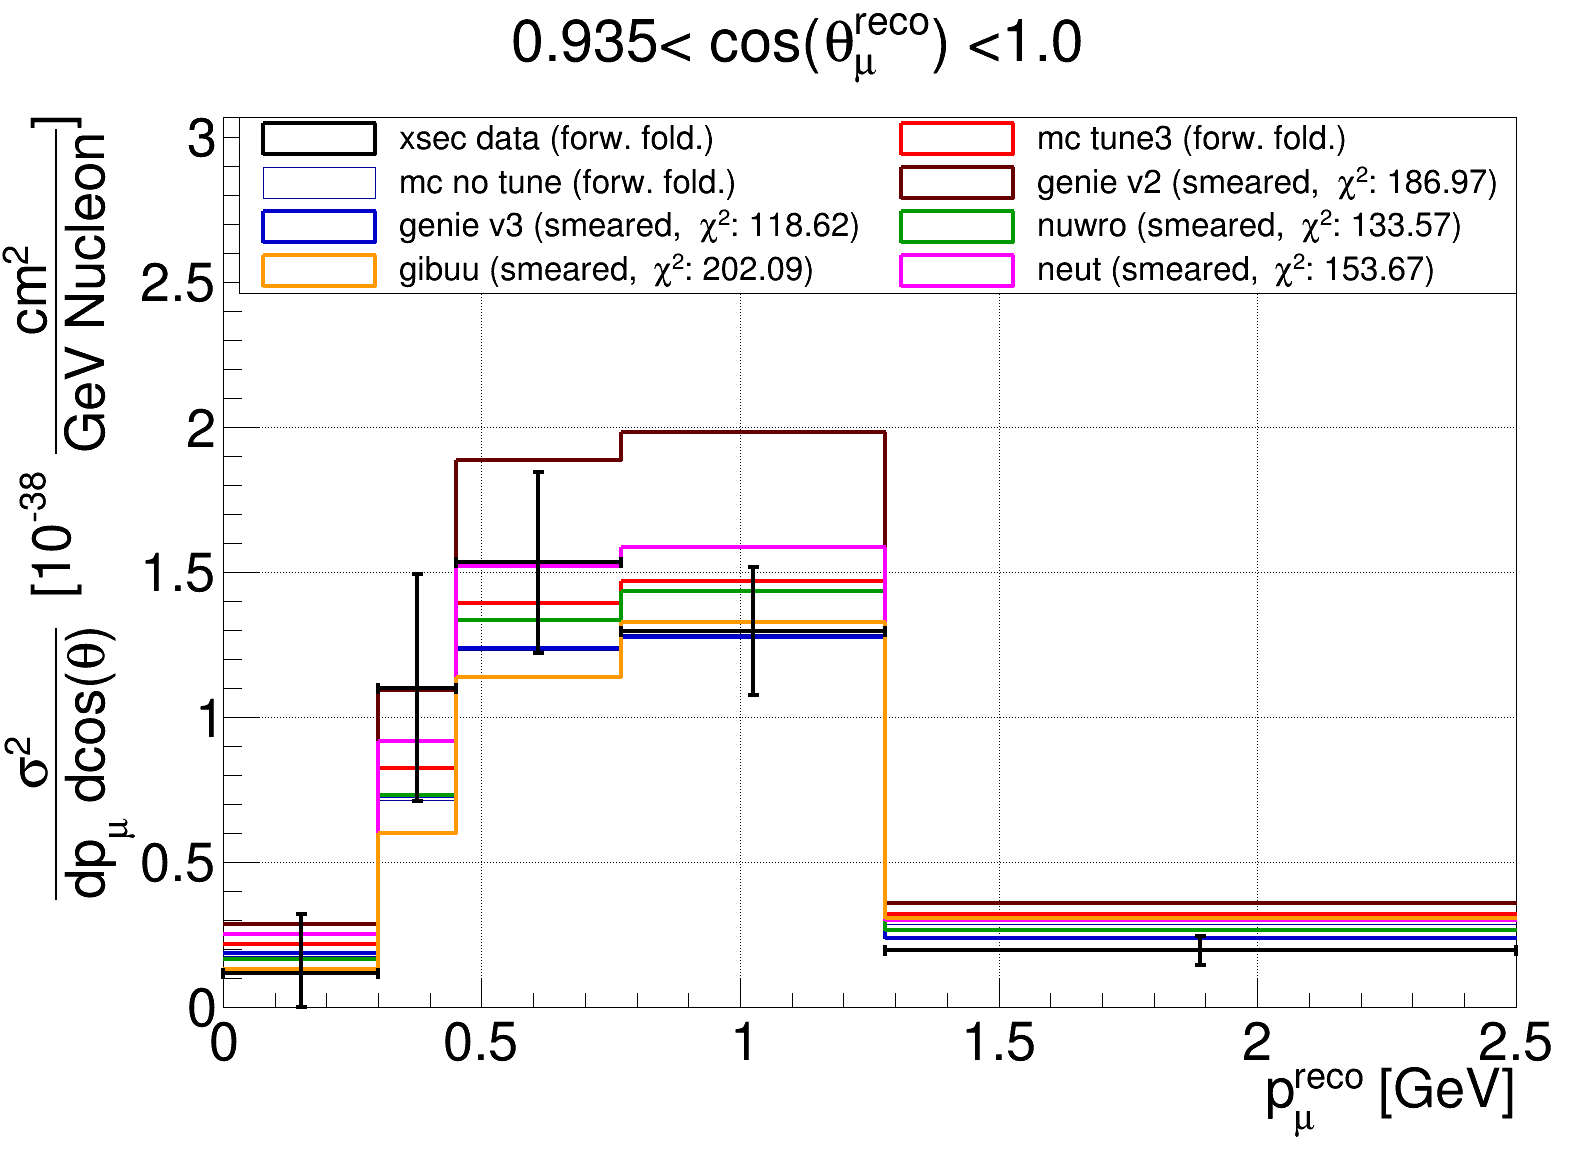

In [12]:
ROOT.gStyle.SetOptTitle(1)

path_cv = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
path = '/home/tmettler/Share/data_hist/'
f_res = ROOT.TFile.Open(path_cv+"xsec_2D_result.root", 'read')
f_cv = ROOT.TFile.Open(path_cv+"xsec_2D_wighted.root", 'read')

f_g2 = ROOT.TFile.Open(path+"ccinc_2d_genie2.root", 'read')
f_g3 = ROOT.TFile.Open(path+"ccinc_2d_genie3.root", 'read')
f_gibuu = ROOT.TFile.Open(path+"ccinc_2d_gibuu.root", 'read')
f_nuwro = ROOT.TFile.Open(path+"ccinc_2d_nuwro.root", 'read')
f_neut = ROOT.TFile.Open(path+"ccinc_2d_neut.root", 'read')

h_xsec_data = f_res.Get('xsec_data')
#h_xsec_data.Scale(1e-38)
h_mc = f_cv.Get('xsec_signal')
h_mc.SetFillColor(0)
h_mc_noTune = f_cv.Get('xsec_true_noweight_smear')
h_mc_noTune.SetFillColor(0)
h_covariance_matrix = f_res.Get('covariance_matrix')

h_xsec_data.GetYaxis().SetTitleSize(0.05)
h_xsec_data.GetYaxis().SetTitleOffset(0.0)
h_xsec_data.GetYaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleSize(0.05)
h_xsec_data.GetXaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleOffset(1)
h_xsec_data.SetLineColor(ROOT.kBlack)
h_xsec_data.SetLineWidth(4)
h_xsec_data.SetMinimum(0)
h_xsec_data.SetMaximum(2.6)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)


h_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_neut = f_neut.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')

h_g2.Scale(1e38)
h_g3.Scale(1e38)
h_nuwro.Scale(1e38)
h_gibuu.Scale(1e38)
h_neut.Scale(1e38)

h_nuwro.SetLineColor(ROOT.kGreen+2)
h_gibuu.SetLineColor(ROOT.kOrange-3)
h_g2.SetLineColor(ROOT.kRed+3)
h_g3.SetLineColor(ROOT.kBlue+1)
h_neut.SetLineColor(ROOT.kMagenta)

h_nuwro.SetLineWidth(4)
h_gibuu.SetLineWidth(4)
h_g2.SetLineWidth(4)
h_g3.SetLineWidth(4)
h_neut.SetLineWidth(4)

h_stat = []
h_data = []

h_signal = []
h_signal_noweight = []
h_G3 = []
h_G2 = []
h_Gibuu = []
h_Nuwro = []
h_Neut = []

bin_counter = 0;
for t_bin in range(len_theta):
    h_stat.append( f_cv.Get('h_xsec_data['+str(t_bin)+']') )
    h_data.append( h_stat[t_bin].Clone() )
    h_signal.append( f_cv.Get('h_xsec_signal['+str(t_bin)+']') )
    h_signal_noweight.append( h_stat[t_bin].Clone() )
    h_G3.append( h_stat[t_bin].Clone() )
    h_G2.append( h_stat[t_bin].Clone() )
    h_Gibuu.append( h_stat[t_bin].Clone() )
    h_Nuwro.append( h_stat[t_bin].Clone() )
    h_Neut.append( h_stat[t_bin].Clone() )
    
    h_Nuwro[t_bin].SetLineColor(ROOT.kGreen+2)
    h_Gibuu[t_bin].SetLineColor(ROOT.kOrange-3)
    h_G2[t_bin].SetLineColor(ROOT.kRed+3)
    h_G3[t_bin].SetLineColor(ROOT.kBlue+1)
    h_Neut[t_bin].SetLineColor(ROOT.kMagenta)

    h_Nuwro[t_bin].SetLineWidth(4)
    h_Gibuu[t_bin].SetLineWidth(4)
    h_G2[t_bin].SetLineWidth(4)
    h_G3[t_bin].SetLineWidth(4)
    h_Neut[t_bin].SetLineWidth(4)
    
    h_signal[t_bin].SetLineWidth(4)
    h_signal[t_bin].SetLineColor(ROOT.kRed)
    
    h_data[t_bin].GetYaxis().SetTitleSize(0.05)
    h_data[t_bin].GetYaxis().SetTitleOffset(0.0)
    h_data[t_bin].GetYaxis().SetLabelSize(0.05)
    h_data[t_bin].GetXaxis().SetTitleSize(0.05)
    h_data[t_bin].GetXaxis().SetLabelSize(0.05)
    h_data[t_bin].GetXaxis().SetTitleOffset(1)
    h_data[t_bin].SetLineColor(ROOT.kBlack)
    h_data[t_bin].SetLineWidth(4)
    h_data[t_bin].SetMinimum(0)
    ROOT.gStyle.SetEndErrorSize(5)
    c1.SetRightMargin(0.05)
    
    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_data[t_bin].SetBinContent(m_bin+1,h_xsec_data.GetBinContent(bin_counter))
        h_data[t_bin].SetBinError(m_bin+1,h_xsec_data.GetBinError(bin_counter))
        
        h_signal_noweight[t_bin].SetBinContent(m_bin+1,h_mc_noTune.GetBinContent(bin_counter))
        h_signal_noweight[t_bin].SetBinError(m_bin+1,h_mc_noTune.GetBinError(bin_counter))
        
        h_G3[t_bin].SetBinContent(m_bin+1,h_g3.GetBinContent(bin_counter))
        h_G3[t_bin].SetBinError(m_bin+1,h_g3.GetBinError(bin_counter))
        
        h_G2[t_bin].SetBinContent(m_bin+1,h_g2.GetBinContent(bin_counter))
        h_G2[t_bin].SetBinError(m_bin+1,h_g2.GetBinError(bin_counter))
        
        h_Gibuu[t_bin].SetBinContent(m_bin+1,h_gibuu.GetBinContent(bin_counter))
        h_Gibuu[t_bin].SetBinError(m_bin+1,h_gibuu.GetBinError(bin_counter))
        
        h_Nuwro[t_bin].SetBinContent(m_bin+1,h_nuwro.GetBinContent(bin_counter))
        h_Nuwro[t_bin].SetBinError(m_bin+1,h_nuwro.GetBinError(bin_counter))
        
        h_Neut[t_bin].SetBinContent(m_bin+1,h_neut.GetBinContent(bin_counter))
        h_Neut[t_bin].SetBinError(m_bin+1,h_neut.GetBinError(bin_counter))
        
    h_data[t_bin].SetTitle(str(theta_bins[t_bin])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[t_bin+1]))
    h_data[t_bin].SetXTitle("p^{reco}_{#mu} [GeV]")
    h_data[t_bin].SetYTitle('#frac{#sigma^{2}}{dp_{#mu} dcos(#theta)} \t [10^{-38} #frac{cm^{2}}{GeV Nucleon}]')
    
    h_data[t_bin].SetMaximum(h_data[t_bin].GetMaximum()*2.0)
    h_data[t_bin].Draw('E1')
    h_signal[t_bin].Draw('same hist')
    h_signal_noweight[t_bin].Draw('same hist')

    h_G2[t_bin].Draw('same hist')
    h_G3[t_bin].Draw('same hist')
    #h_g3_smeare.Draw('same hsit')
    h_Nuwro[t_bin].Draw('same hist')
    h_Neut[t_bin].Draw('same hist')
    h_Gibuu[t_bin].Draw('same hist')


    legend = ROOT.TLegend(0.15,0.75,0.95,0.9); #LEGEND RIGHT
    legend.SetNColumns(2)
    legend.AddEntry(h_data[t_bin],'xsec data (forw. fold.)',"f")
    legend.AddEntry(h_signal[t_bin],'mc tune3 (forw. fold.)',"f") #+'/{:04.2f})'.format(chi2_mc/6)
    legend.AddEntry(h_signal_noweight[t_bin],'mc no tune (forw. fold.)'.format(chi2_mc_noTune),"f")
    legend.AddEntry(h_G2[t_bin],'genie v2 (smeared, #chi^{2}: '+h_g2.GetTitle()+')',"f")
    legend.AddEntry(h_G3[t_bin],'genie v3 (smeared, #chi^{2}: '+h_g3.GetTitle()+')',"f")
    legend.AddEntry(h_Nuwro[t_bin],'nuwro (smeared, #chi^{2}: '+h_nuwro.GetTitle()+')',"f")
    legend.AddEntry(h_Gibuu[t_bin],'gibuu (smeared, #chi^{2}: '+h_gibuu.GetTitle()+')',"f")
    legend.AddEntry(h_Neut[t_bin],'neut (smeared, #chi^{2}: '+h_neut.GetTitle()+')',"f")
    #legend.AddEntry(h_neut,'neut',"f")
    legend.Draw()
    h_data[t_bin].Draw('E1 same')


    #prelim, pot_tex = draw_adding()
    #prelim.Draw()
    #pot_tex.Draw()

    c1.Draw()
    c1.SaveAs(outputdir_png + "h_xsec_generators_"+str(t_bin)+".png")
    #c1.SaveAs(outputdir_root + "h_xsec_generators_"+str(t_bin)+".root")
    c1.SaveAs(outputdir_pdf + "h_xsec_generators_"+str(t_bin)+".pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/png/h_xsec_generators_0_ratio.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/pdf/h_xsec_generators_0_ratio.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/png/h_xsec_generators_1_ratio.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/pdf/h_xsec_generators_1_ratio.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/

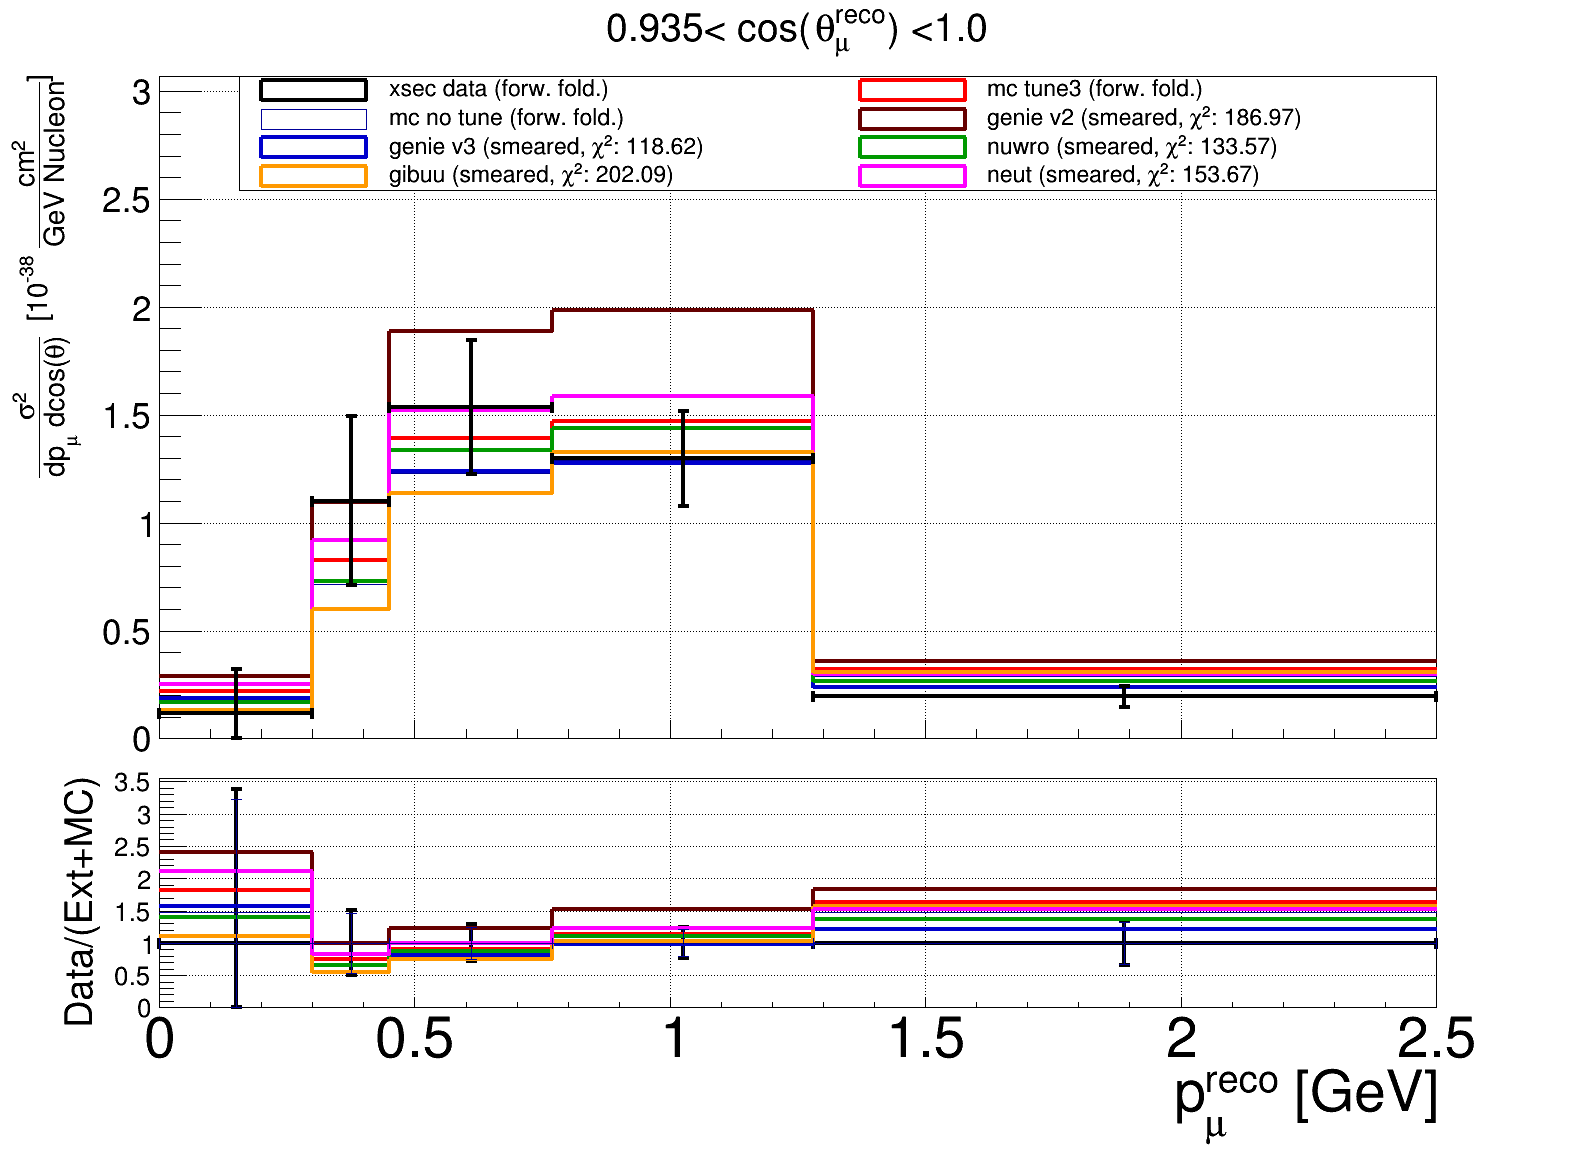

In [13]:
ROOT.gStyle.SetOptTitle(1)

path_cv = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
path = '/home/tmettler/Share/data_hist/'
f_res = ROOT.TFile.Open(path_cv+"xsec_2D_result.root", 'read')
f_cv = ROOT.TFile.Open(path_cv+"xsec_2D_wighted.root", 'read')

f_g2 = ROOT.TFile.Open(path+"ccinc_2d_genie2.root", 'read')
f_g3 = ROOT.TFile.Open(path+"ccinc_2d_genie3.root", 'read')
f_gibuu = ROOT.TFile.Open(path+"ccinc_2d_gibuu.root", 'read')
f_nuwro = ROOT.TFile.Open(path+"ccinc_2d_nuwro.root", 'read')
f_neut = ROOT.TFile.Open(path+"ccinc_2d_neut.root", 'read')

h_xsec_data = f_res.Get('xsec_data')
#h_xsec_data.Scale(1e-38)
h_mc = f_cv.Get('xsec_signal')
h_mc.SetFillColor(0)
h_mc_noTune = f_cv.Get('xsec_true_noweight_smear')
h_mc_noTune.SetFillColor(0)
h_covariance_matrix = f_res.Get('covariance_matrix')

h_xsec_data.GetYaxis().SetTitleSize(0.05)
h_xsec_data.GetYaxis().SetTitleOffset(0.0)
h_xsec_data.GetYaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleSize(0.05)
h_xsec_data.GetXaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleOffset(1)
h_xsec_data.SetLineColor(ROOT.kBlack)
h_xsec_data.SetLineWidth(4)
h_xsec_data.SetMinimum(0)
h_xsec_data.SetMaximum(2.6)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)


h_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_neut = f_neut.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')

h_g2.Scale(1e38)
h_g3.Scale(1e38)
h_nuwro.Scale(1e38)
h_gibuu.Scale(1e38)
h_neut.Scale(1e38)

h_nuwro.SetLineColor(ROOT.kGreen+2)
h_gibuu.SetLineColor(ROOT.kOrange-3)
h_g2.SetLineColor(ROOT.kRed+3)
h_g3.SetLineColor(ROOT.kBlue+1)
h_neut.SetLineColor(ROOT.kMagenta)

h_nuwro.SetLineWidth(4)
h_gibuu.SetLineWidth(4)
h_g2.SetLineWidth(4)
h_g3.SetLineWidth(4)
h_neut.SetLineWidth(4)

h_stat = []
h_data = []

h_signal = []
h_signal_noweight = []
h_G3 = []
h_G2 = []
h_Gibuu = []
h_Nuwro = []
h_Neut = []

bin_counter = 0;
for t_bin in range(len_theta):
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.1)
    #c1.SetFillStyle(4000);
    # first pad
    c1.cd()
    pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
    pad1.SetGrid(1)
    pad1.Draw()
    pad1.cd()
    pad1.SetBottomMargin(0.03);
    pad1.SetTopMargin(0.1)
    
    h_stat.append( f_cv.Get('h_xsec_data['+str(t_bin)+']') )
    h_data.append( h_stat[t_bin].Clone() )
    h_signal.append( f_cv.Get('h_xsec_signal['+str(t_bin)+']') )
    h_signal_noweight.append( h_stat[t_bin].Clone() )
    h_G3.append( h_stat[t_bin].Clone() )
    h_G2.append( h_stat[t_bin].Clone() )
    h_Gibuu.append( h_stat[t_bin].Clone() )
    h_Nuwro.append( h_stat[t_bin].Clone() )
    h_Neut.append( h_stat[t_bin].Clone() )
    
    h_Nuwro[t_bin].SetLineColor(ROOT.kGreen+2)
    h_Gibuu[t_bin].SetLineColor(ROOT.kOrange-3)
    h_G2[t_bin].SetLineColor(ROOT.kRed+3)
    h_G3[t_bin].SetLineColor(ROOT.kBlue+1)
    h_Neut[t_bin].SetLineColor(ROOT.kMagenta)

    h_Nuwro[t_bin].SetLineWidth(4)
    h_Gibuu[t_bin].SetLineWidth(4)
    h_G2[t_bin].SetLineWidth(4)
    h_G3[t_bin].SetLineWidth(4)
    h_Neut[t_bin].SetLineWidth(4)
    
    h_signal[t_bin].SetLineWidth(4)
    h_signal[t_bin].SetLineColor(ROOT.kRed)
    
    h_data[t_bin].GetYaxis().SetTitleSize(0.04)
    h_data[t_bin].GetYaxis().SetTitleOffset(0.0)
    h_data[t_bin].GetYaxis().SetLabelSize(0.05)
    h_data[t_bin].GetXaxis().SetTitleSize(0.05)
    h_data[t_bin].GetXaxis().SetLabelSize(0.05)
    h_data[t_bin].GetXaxis().SetTitleOffset(1)
    h_data[t_bin].SetLineColor(ROOT.kBlack)
    h_data[t_bin].SetLineWidth(4)
    h_data[t_bin].SetMinimum(0)
    ROOT.gStyle.SetEndErrorSize(5)
    c1.SetRightMargin(0.05)
    
    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_data[t_bin].SetBinContent(m_bin+1,h_xsec_data.GetBinContent(bin_counter))
        h_data[t_bin].SetBinError(m_bin+1,h_xsec_data.GetBinError(bin_counter))
        
        h_signal_noweight[t_bin].SetBinContent(m_bin+1,h_mc_noTune.GetBinContent(bin_counter))
        h_signal_noweight[t_bin].SetBinError(m_bin+1,h_mc_noTune.GetBinError(bin_counter))
        
        h_G3[t_bin].SetBinContent(m_bin+1,h_g3.GetBinContent(bin_counter))
        h_G3[t_bin].SetBinError(m_bin+1,h_g3.GetBinError(bin_counter))
        
        h_G2[t_bin].SetBinContent(m_bin+1,h_g2.GetBinContent(bin_counter))
        h_G2[t_bin].SetBinError(m_bin+1,h_g2.GetBinError(bin_counter))
        
        h_Gibuu[t_bin].SetBinContent(m_bin+1,h_gibuu.GetBinContent(bin_counter))
        h_Gibuu[t_bin].SetBinError(m_bin+1,h_gibuu.GetBinError(bin_counter))
        
        h_Nuwro[t_bin].SetBinContent(m_bin+1,h_nuwro.GetBinContent(bin_counter))
        h_Nuwro[t_bin].SetBinError(m_bin+1,h_nuwro.GetBinError(bin_counter))
        
        h_Neut[t_bin].SetBinContent(m_bin+1,h_neut.GetBinContent(bin_counter))
        h_Neut[t_bin].SetBinError(m_bin+1,h_neut.GetBinError(bin_counter))
        
    h_data[t_bin].SetTitle(str(theta_bins[t_bin])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[t_bin+1]))
    h_data[t_bin].SetXTitle("p^{reco}_{#mu} [GeV]")
    h_data[t_bin].SetYTitle('#frac{#sigma^{2}}{dp_{#mu} dcos(#theta)} \t [10^{-38} #frac{cm^{2}}{GeV Nucleon}]')
    
    h_data[t_bin].SetMaximum(h_data[t_bin].GetMaximum()*2.0)
    h_data[t_bin].Draw('E1')
    h_signal[t_bin].Draw('same hist')
    h_signal_noweight[t_bin].Draw('same hist')

    h_G2[t_bin].Draw('same hist')
    h_G3[t_bin].Draw('same hist')
    #h_g3_smeare.Draw('same hsit')
    h_Nuwro[t_bin].Draw('same hist')
    h_Neut[t_bin].Draw('same hist')
    h_Gibuu[t_bin].Draw('same hist')


    legend = ROOT.TLegend(0.15,0.75,0.9,0.9); #LEGEND RIGHT
    legend.SetNColumns(2)
    legend.AddEntry(h_data[t_bin],'xsec data (forw. fold.)',"f")
    legend.AddEntry(h_signal[t_bin],'mc tune3 (forw. fold.)',"f") #+'/{:04.2f})'.format(chi2_mc/6)
    legend.AddEntry(h_signal_noweight[t_bin],'mc no tune (forw. fold.)'.format(chi2_mc_noTune),"f")
    legend.AddEntry(h_G2[t_bin],'genie v2 (smeared, #chi^{2}: '+h_g2.GetTitle()+')',"f")
    legend.AddEntry(h_G3[t_bin],'genie v3 (smeared, #chi^{2}: '+h_g3.GetTitle()+')',"f")
    legend.AddEntry(h_Nuwro[t_bin],'nuwro (smeared, #chi^{2}: '+h_nuwro.GetTitle()+')',"f")
    legend.AddEntry(h_Gibuu[t_bin],'gibuu (smeared, #chi^{2}: '+h_gibuu.GetTitle()+')',"f")
    legend.AddEntry(h_Neut[t_bin],'neut (smeared, #chi^{2}: '+h_neut.GetTitle()+')',"f")
    #legend.AddEntry(h_neut,'neut',"f")
    legend.Draw()
    h_data[t_bin].Draw('E1 same')

    h_data[t_bin].GetXaxis().SetLabelOffset(999);
    h_data[t_bin].GetXaxis().SetTitleOffset(999);
    h_data[t_bin].GetXaxis().SetLabelSize(0);
    h_data[t_bin].GetXaxis().SetTitleSize(0);

    c1.cd()

    h_data[t_bin].GetXaxis().SetLabelOffset(0);
    h_data[t_bin].GetXaxis().SetTitleOffset(0);

    pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
    pad2.SetGrid(1)
    pad2.SetTopMargin(0.04)
    pad2.SetBottomMargin(0.4)
    pad2.Draw()
    pad2.cd()
    
    h_xsec_data_ratio = h_data[t_bin].Clone()
    h_xsec_data_ratio.Divide(h_data[t_bin])
    h_xsec_stat_ratio = h_stat[t_bin].Clone()
    h_xsec_stat_ratio.Divide(h_data[t_bin])
    h_mc_ratio = h_signal[t_bin].Clone()
    h_mc_ratio.Divide(h_data[t_bin])
    
    h_mc_ratio_noweight = h_signal_noweight[t_bin].Clone()
    h_mc_ratio_noweight.Divide(h_data[t_bin])
    
    h_G2_ratio = h_G2[t_bin].Clone()
    h_G2_ratio.Divide(h_data[t_bin])
    h_G3_ratio = h_G3[t_bin].Clone()
    h_G3_ratio.Divide(h_data[t_bin])
    h_Nuwro_ratio = h_Nuwro[t_bin].Clone()
    h_Nuwro_ratio.Divide(h_data[t_bin])
    h_Gibuu_ratio = h_Gibuu[t_bin].Clone()
    h_Gibuu_ratio.Divide(h_data[t_bin])
    h_Neut_ratio = h_Neut[t_bin].Clone()
    h_Neut_ratio.Divide(h_data[t_bin])

    h_mc_ratio.SetFillColor(0)
    h_xsec_data_ratio.SetTitle(' ')
    h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
    h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
    h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
    h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
    h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
    h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
    h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)
    
    h_xsec_data_ratio.SetMaximum(-1111)
    h_xsec_data_ratio.Draw('E1')
    h_mc_ratio.Draw('hist same')
    h_mc_ratio_noweight.Draw('hist same')
    h_G2_ratio.Draw('hist same')
    h_G3_ratio.Draw('hist same')
    h_Nuwro_ratio.Draw('hist same')
    h_Gibuu_ratio.Draw('hist same')
    h_Neut_ratio.Draw('hist same')
    h_xsec_stat_ratio.Draw('E1 same')

    c1.Draw()
    c1.SaveAs(outputdir_png + "h_xsec_generators_"+str(t_bin)+"_ratio.png")
    #c1.SaveAs(outputdir_root + "h_xsec_generators_"+str(t_bin)+"_ratio.root")
    c1.SaveAs(outputdir_pdf + "h_xsec_generators_"+str(t_bin)+"_ratio.pdf")


In [14]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/png/h_xsec_generators_chi2.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/root/h_xsec_generators_chi2.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/pdf/h_xsec_generators_chi2.pdf has been created


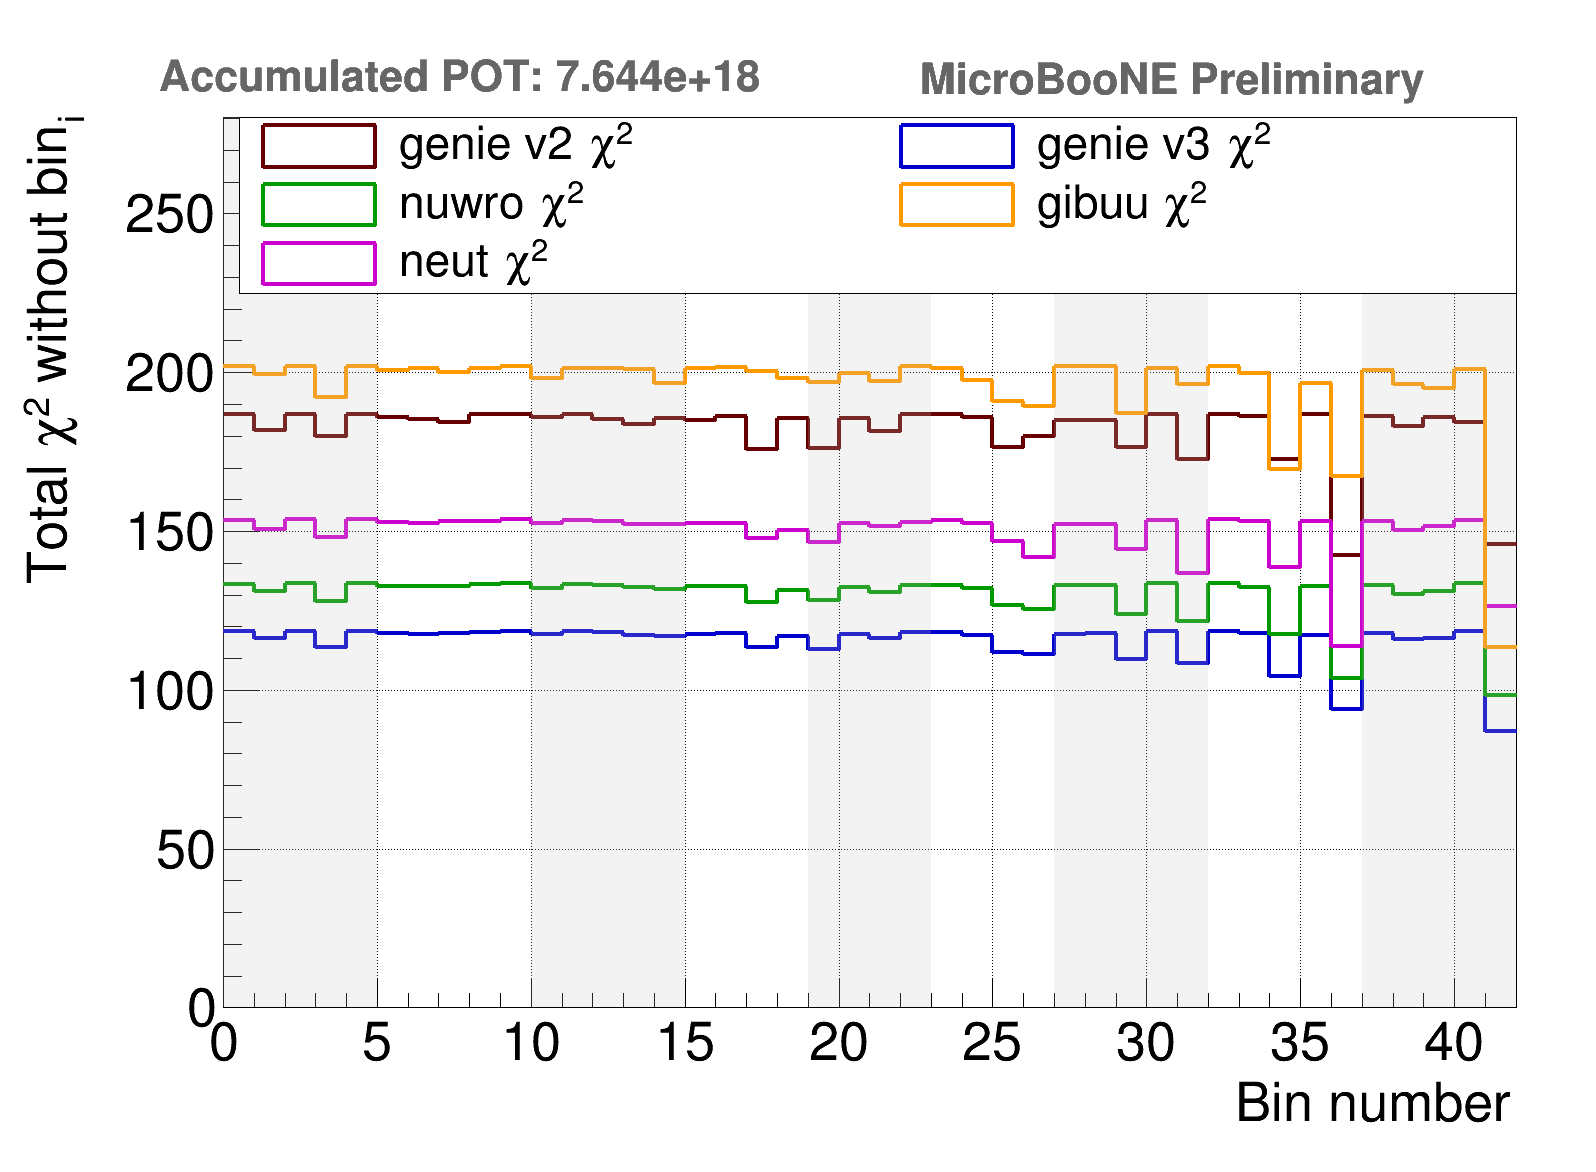

In [15]:
#path_cv = '/home/tmettler/Desktop/weighted/xsec_filesV4/'
#path = '/home/tmettler/Share/data_hist/'
#f_cv = ROOT.TFile.Open(path_cv+"xsec_theta_result.root", 'read')
'''
f_g2 = ROOT.TFile.Open(path+"ccinc_tom_genie2.root", 'read')
f_g3 = ROOT.TFile.Open(path+"ccinc_tom_genie3.root", 'read')
f_gibuu = ROOT.TFile.Open(path+"ccinc_tom_gibuu.root", 'read')
f_neut = ROOT.TFile.Open(path+"test_neut.root", 'read')
f_nuwro = ROOT.TFile.Open(path+"ccinc_tom_nuwro.root", 'read')
'''
h_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_Chi2NMinusOne')
h_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_Chi2NMinusOne')
h_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_Chi2NMinusOne')
h_neut = f_neut.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_Chi2NMinusOne')
h_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_Chi2NMinusOne')

h_nuwro.SetLineColor(ROOT.kGreen+2)
h_gibuu.SetLineColor(ROOT.kOrange-3)
h_g2.SetLineColor(ROOT.kRed+3)
h_g3.SetLineColor(ROOT.kBlue+1)
h_neut.SetLineColor(ROOT.kMagenta+1)

h_nuwro.SetLineWidth(4)
h_gibuu.SetLineWidth(4)
h_g2.SetLineWidth(4)
h_g3.SetLineWidth(4)
h_neut.SetLineWidth(4)

h_g2.GetYaxis().SetTitleSize(0.05)
h_g2.GetYaxis().SetTitleOffset(0.0)
h_g2.GetYaxis().SetLabelSize(0.05)
h_g2.GetXaxis().SetTitleSize(0.05)
h_g2.GetXaxis().SetLabelSize(0.05)
h_g2.GetXaxis().SetTitleOffset(1)
h_g2.SetMinimum(0)
h_g2.SetMaximum(-1111)
h_g2.SetMaximum(h_g2.GetMaximum()*1.5)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_g2.SetXTitle("Bin number")


h_bin_bkg = h_g2.Clone()
bin_counter = 0
for t_bin in range(len_theta): #len_theta
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bin_bkg.SetBinContent(bin_counter,0)
            if t_bin%2==0:
                h_bin_bkg.SetBinContent(bin_counter,1000)
h_bin_bkg.SetLineWidth(0)
h_bin_bkg.SetFillColorAlpha(ROOT.kGray,0.2)

h_g2.Draw('hist')
h_g3.Draw('same hist')
h_nuwro.Draw('same hist')
h_neut.Draw('same hist')
h_gibuu.Draw('same hist')
h_bin_bkg.Draw('same hist')



legend = ROOT.TLegend(0.15,0.75,0.95,0.9); #LEGEND RIGHT
legend.SetNColumns(2)
legend.AddEntry(h_g2,'genie v2 #chi^{2}',"f")
legend.AddEntry(h_g3,'genie v3 #chi^{2}',"f")
legend.AddEntry(h_nuwro,'nuwro #chi^{2}',"f")
legend.AddEntry(h_gibuu,'gibuu #chi^{2}',"f")
legend.AddEntry(h_neut,'neut #chi^{2}',"f")
legend.Draw()

prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()


c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_generators_chi2.png")
c1.SaveAs(outputdir_root + "h_xsec_generators_chi2.root")
c1.SaveAs(outputdir_pdf + "h_xsec_generators_chi2.pdf")


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/png/h_xsec_generators_chi2_marco.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/root/h_xsec_generators_chi2_marco.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/pdf/h_xsec_generators_chi2_marco.pdf has been created


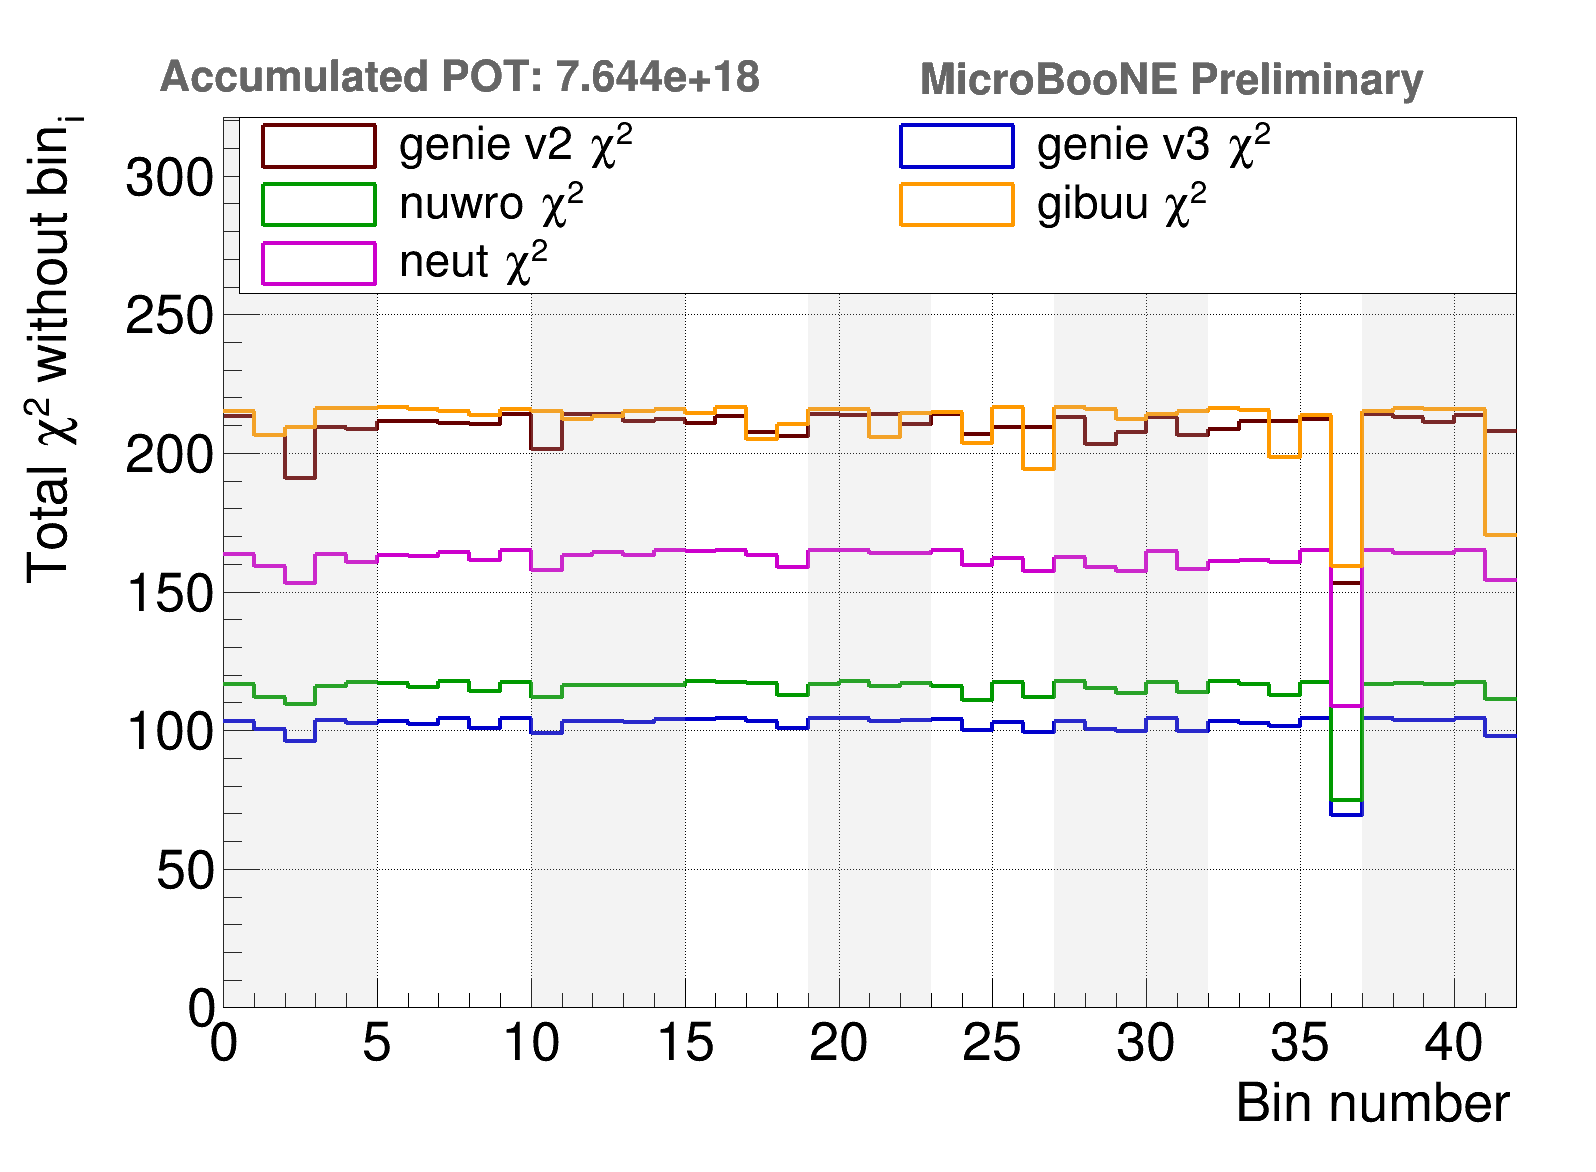

In [16]:
#path_cv = '/home/tmettler/Desktop/weighted/xsec_filesV4/'
#path = '/home/tmettler/Share/data_hist/'
#f_cv = ROOT.TFile.Open(path_cv+"xsec_theta_result.root", 'read')

f_g2 = ROOT.TFile.Open(path+"ccinc_2d_genie2_marco.root", 'read')
f_g3 = ROOT.TFile.Open(path+"ccinc_2d_genie3_marco.root", 'read')
f_gibuu = ROOT.TFile.Open(path+"ccinc_2d_gibuu_marco.root", 'read')
f_nuwro = ROOT.TFile.Open(path+"ccinc_2d_nuwro_marco.root", 'read')
f_neut = ROOT.TFile.Open(path+"ccinc_2d_neut_marco.root", 'read')

h_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_Chi2NMinusOne')
h_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_Chi2NMinusOne')
h_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_Chi2NMinusOne')
h_neut = f_neut.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_Chi2NMinusOne')
h_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_Chi2NMinusOne')

h_nuwro.SetLineColor(ROOT.kGreen+2)
h_gibuu.SetLineColor(ROOT.kOrange-3)
h_g2.SetLineColor(ROOT.kRed+3)
h_g3.SetLineColor(ROOT.kBlue+1)
h_neut.SetLineColor(ROOT.kMagenta+1)

h_nuwro.SetLineWidth(4)
h_gibuu.SetLineWidth(4)
h_g2.SetLineWidth(4)
h_g3.SetLineWidth(4)
h_neut.SetLineWidth(4)

h_g2.GetYaxis().SetTitleSize(0.05)
h_g2.GetYaxis().SetTitleOffset(0.0)
h_g2.GetYaxis().SetLabelSize(0.05)
h_g2.GetXaxis().SetTitleSize(0.05)
h_g2.GetXaxis().SetLabelSize(0.05)
h_g2.GetXaxis().SetTitleOffset(1)
h_g2.SetMinimum(0)
h_g2.SetMaximum(-1111)
h_g2.SetMaximum(h_g2.GetMaximum()*1.5)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_bin_bkg = h_g2.Clone()
bin_counter = 0
for t_bin in range(len_theta): #len_theta
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bin_bkg.SetBinContent(bin_counter,0)
            if t_bin%2==0:
                h_bin_bkg.SetBinContent(bin_counter,1000)
h_bin_bkg.SetLineWidth(0)
h_bin_bkg.SetFillColorAlpha(ROOT.kGray,0.2)

h_g2.SetXTitle("Bin number")

h_g2.Draw('hist')
h_g3.Draw('same hist')
h_nuwro.Draw('same hist')
h_neut.Draw('same hist')
h_gibuu.Draw('same hist')
h_bin_bkg.Draw('same hist')



legend = ROOT.TLegend(0.15,0.75,0.95,0.9); #LEGEND RIGHT
legend.SetNColumns(2)
legend.AddEntry(h_g2,'genie v2 #chi^{2}',"f")
legend.AddEntry(h_g3,'genie v3 #chi^{2}',"f")
legend.AddEntry(h_nuwro,'nuwro #chi^{2}',"f")
legend.AddEntry(h_gibuu,'gibuu #chi^{2}',"f")
legend.AddEntry(h_neut,'neut #chi^{2}',"f")
legend.Draw()

prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()


c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_generators_chi2_marco.png")
c1.SaveAs(outputdir_root + "h_xsec_generators_chi2_marco.root")
c1.SaveAs(outputdir_pdf + "h_xsec_generators_chi2_marco.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/png/h_xsec_generators_0_ratio_marco.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/pdf/h_xsec_generators_0_ratio_marco.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/png/h_xsec_generators_1_ratio_marco.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators_2D/pdf/h_xsec_generators_1_ratio_marco.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file

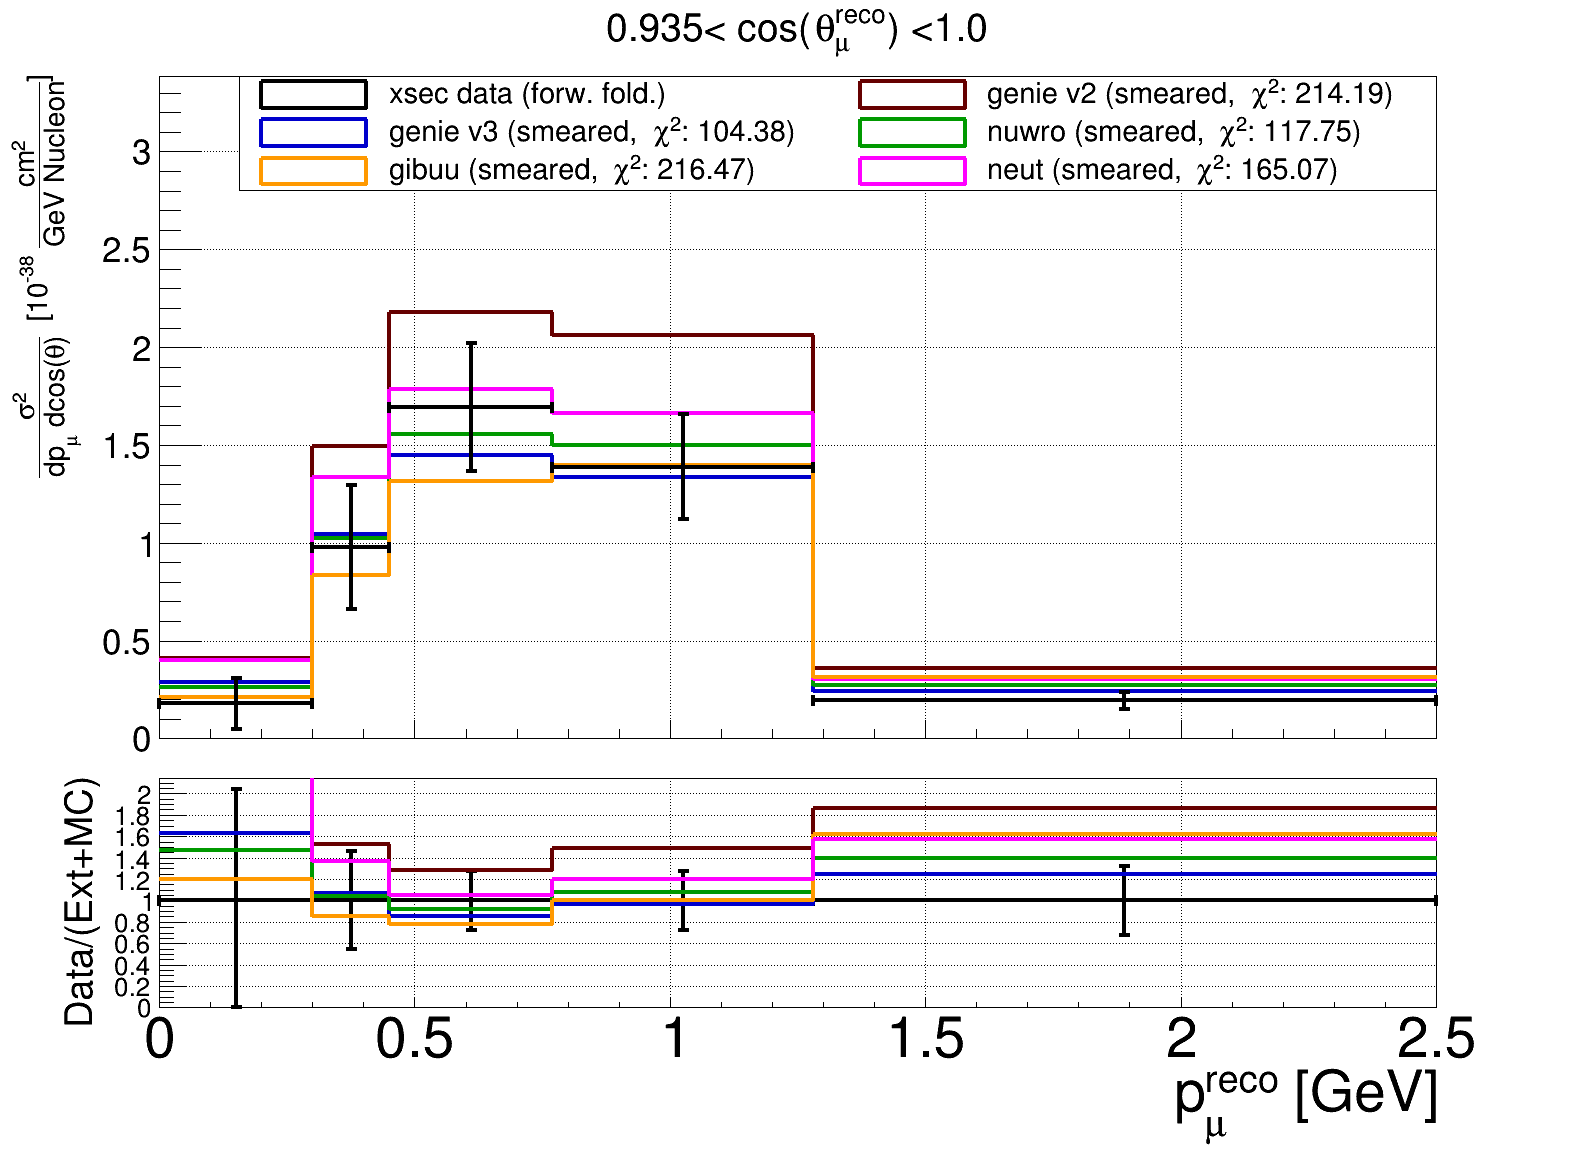

In [17]:
ROOT.gStyle.SetOptTitle(1)

path_cv = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
path = '/home/tmettler/Share/data_hist/'
f_res = ROOT.TFile.Open(path_cv+"microboone_numu_cc_inclusive_marco.root", 'read')
f_cv = ROOT.TFile.Open(path_cv+"xsec_2D_wighted.root", 'read')


h_xsec_data = f_res.Get('xsec_data')
#h_xsec_data.Scale(1e-38)
#h_mc = f_cv.Get('xsec_signal')
#h_mc.SetFillColor(0)
#h_mc_noTune = f_cv.Get('xsec_true_noweight_smear')
#h_mc_noTune.SetFillColor(0)
h_covariance_matrix = f_res.Get('covariance_matrix')

h_xsec_data.GetYaxis().SetTitleSize(0.05)
h_xsec_data.GetYaxis().SetTitleOffset(0.0)
h_xsec_data.GetYaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleSize(0.05)
h_xsec_data.GetXaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleOffset(1)
h_xsec_data.SetLineColor(ROOT.kBlack)
h_xsec_data.SetLineWidth(4)
h_xsec_data.SetMinimum(0)
h_xsec_data.SetMaximum(2.6)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

f_g2 = ROOT.TFile.Open(path+"ccinc_2d_genie2_marco.root", 'read')
f_g3 = ROOT.TFile.Open(path+"ccinc_2d_genie3_marco.root", 'read')
f_gibuu = ROOT.TFile.Open(path+"ccinc_2d_gibuu_marco.root", 'read')
f_nuwro = ROOT.TFile.Open(path+"ccinc_2d_nuwro_marco.root", 'read')
f_neut = ROOT.TFile.Open(path+"ccinc_2d_neut_marco.root", 'read')

h_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_neut = f_neut.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')

h_g2.Scale(1e38)
h_g3.Scale(1e38)
h_nuwro.Scale(1e38)
h_gibuu.Scale(1e38)
h_neut.Scale(1e38)

h_nuwro.SetLineColor(ROOT.kGreen+2)
h_gibuu.SetLineColor(ROOT.kOrange-3)
h_g2.SetLineColor(ROOT.kRed+3)
h_g3.SetLineColor(ROOT.kBlue+1)
h_neut.SetLineColor(ROOT.kMagenta)

h_nuwro.SetLineWidth(4)
h_gibuu.SetLineWidth(4)
h_g2.SetLineWidth(4)
h_g3.SetLineWidth(4)
h_neut.SetLineWidth(4)

h_stat = []
h_data = []

h_signal = []
h_signal_noweight = []
h_G3 = []
h_G2 = []
h_Gibuu = []
h_Nuwro = []
h_Neut = []

bin_counter = 0;
for t_bin in range(len_theta):
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.1)
    #c1.SetFillStyle(4000);
    # first pad
    c1.cd()
    pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
    pad1.SetGrid(1)
    pad1.Draw()
    pad1.cd()
    pad1.SetBottomMargin(0.03);
    pad1.SetTopMargin(0.1)
    
    h_stat.append( f_cv.Get('h_xsec_data['+str(t_bin)+']') )
    h_data.append( h_stat[t_bin].Clone() )
    #h_signal.append( f_cv.Get('h_xsec_signal['+str(t_bin)+']') )
    #h_signal_noweight.append( h_stat[t_bin].Clone() )
    h_G3.append( h_stat[t_bin].Clone() )
    h_G2.append( h_stat[t_bin].Clone() )
    h_Gibuu.append( h_stat[t_bin].Clone() )
    h_Nuwro.append( h_stat[t_bin].Clone() )
    h_Neut.append( h_stat[t_bin].Clone() )
    
    h_Nuwro[t_bin].SetLineColor(ROOT.kGreen+2)
    h_Gibuu[t_bin].SetLineColor(ROOT.kOrange-3)
    h_G2[t_bin].SetLineColor(ROOT.kRed+3)
    h_G3[t_bin].SetLineColor(ROOT.kBlue+1)
    h_Neut[t_bin].SetLineColor(ROOT.kMagenta)

    h_Nuwro[t_bin].SetLineWidth(4)
    h_Gibuu[t_bin].SetLineWidth(4)
    h_G2[t_bin].SetLineWidth(4)
    h_G3[t_bin].SetLineWidth(4)
    h_Neut[t_bin].SetLineWidth(4)
    
    #h_signal[t_bin].SetLineWidth(4)
    #h_signal[t_bin].SetLineColor(ROOT.kRed)
    
    h_data[t_bin].GetYaxis().SetTitleSize(0.04)
    h_data[t_bin].GetYaxis().SetTitleOffset(0.0)
    h_data[t_bin].GetYaxis().SetLabelSize(0.05)
    h_data[t_bin].GetXaxis().SetTitleSize(0.05)
    h_data[t_bin].GetXaxis().SetLabelSize(0.05)
    h_data[t_bin].GetXaxis().SetTitleOffset(1)
    h_data[t_bin].SetLineColor(ROOT.kBlack)
    h_data[t_bin].SetLineWidth(4)
    h_data[t_bin].SetMinimum(0)
    ROOT.gStyle.SetEndErrorSize(5)
    c1.SetRightMargin(0.05)
    
    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_data[t_bin].SetBinContent(m_bin+1,h_xsec_data.GetBinContent(bin_counter))
        h_data[t_bin].SetBinError(m_bin+1,math.sqrt(h_covariance_matrix.GetBinContent(bin_counter,bin_counter)))
        
        #h_signal_noweight[t_bin].SetBinContent(m_bin+1,h_mc_noTune.GetBinContent(bin_counter))
        #h_signal_noweight[t_bin].SetBinError(m_bin+1,h_mc_noTune.GetBinError(bin_counter))
        
        h_G3[t_bin].SetBinContent(m_bin+1,h_g3.GetBinContent(bin_counter))
        h_G3[t_bin].SetBinError(m_bin+1,h_g3.GetBinError(bin_counter))
        
        h_G2[t_bin].SetBinContent(m_bin+1,h_g2.GetBinContent(bin_counter))
        h_G2[t_bin].SetBinError(m_bin+1,h_g2.GetBinError(bin_counter))
        
        h_Gibuu[t_bin].SetBinContent(m_bin+1,h_gibuu.GetBinContent(bin_counter))
        h_Gibuu[t_bin].SetBinError(m_bin+1,h_gibuu.GetBinError(bin_counter))
        
        h_Nuwro[t_bin].SetBinContent(m_bin+1,h_nuwro.GetBinContent(bin_counter))
        h_Nuwro[t_bin].SetBinError(m_bin+1,h_nuwro.GetBinError(bin_counter))
        
        h_Neut[t_bin].SetBinContent(m_bin+1,h_neut.GetBinContent(bin_counter))
        h_Neut[t_bin].SetBinError(m_bin+1,h_neut.GetBinError(bin_counter))
        
    h_data[t_bin].SetTitle(str(theta_bins[t_bin])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[t_bin+1]))
    h_data[t_bin].SetXTitle("p^{reco}_{#mu} [GeV]")
    h_data[t_bin].SetYTitle('#frac{#sigma^{2}}{dp_{#mu} dcos(#theta)} \t [10^{-38} #frac{cm^{2}}{GeV Nucleon}]')
    
    h_data[t_bin].SetMaximum(h_data[t_bin].GetMaximum()*2.0)
    h_data[t_bin].Draw('E1')
    #h_signal[t_bin].Draw('same hist')
    #h_signal_noweight[t_bin].Draw('same hist')

    h_G2[t_bin].Draw('same hist')
    h_G3[t_bin].Draw('same hist')
    #h_g3_smeare.Draw('same hsit')
    h_Nuwro[t_bin].Draw('same hist')
    h_Neut[t_bin].Draw('same hist')
    h_Gibuu[t_bin].Draw('same hist')


    legend = ROOT.TLegend(0.15,0.75,0.9,0.9); #LEGEND RIGHT
    legend.SetNColumns(2)
    legend.AddEntry(h_data[t_bin],'xsec data (forw. fold.)',"f")
    #legend.AddEntry(h_signal[t_bin],'mc tune3 (forw. fold.)',"f") #+'/{:04.2f})'.format(chi2_mc/6)
    #legend.AddEntry(h_signal_noweight[t_bin],'mc no tune (forw. fold.)'.format(chi2_mc_noTune),"f")
    legend.AddEntry(h_G2[t_bin],'genie v2 (smeared, #chi^{2}: '+h_g2.GetTitle()+')',"f")
    legend.AddEntry(h_G3[t_bin],'genie v3 (smeared, #chi^{2}: '+h_g3.GetTitle()+')',"f")
    legend.AddEntry(h_Nuwro[t_bin],'nuwro (smeared, #chi^{2}: '+h_nuwro.GetTitle()+')',"f")
    legend.AddEntry(h_Gibuu[t_bin],'gibuu (smeared, #chi^{2}: '+h_gibuu.GetTitle()+')',"f")
    legend.AddEntry(h_Neut[t_bin],'neut (smeared, #chi^{2}: '+h_neut.GetTitle()+')',"f")
    #legend.AddEntry(h_neut,'neut',"f")
    legend.Draw()
    h_data[t_bin].Draw('E1 same')

    h_data[t_bin].GetXaxis().SetLabelOffset(999);
    h_data[t_bin].GetXaxis().SetTitleOffset(999);
    h_data[t_bin].GetXaxis().SetLabelSize(0);
    h_data[t_bin].GetXaxis().SetTitleSize(0);

    c1.cd()

    h_data[t_bin].GetXaxis().SetLabelOffset(0);
    h_data[t_bin].GetXaxis().SetTitleOffset(0);

    pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
    pad2.SetGrid(1)
    pad2.SetTopMargin(0.04)
    pad2.SetBottomMargin(0.4)
    pad2.Draw()
    pad2.cd()
    
    h_xsec_data_ratio = h_data[t_bin].Clone()
    h_xsec_data_ratio.Divide(h_data[t_bin])
    #h_xsec_stat_ratio = h_stat[t_bin].Clone()
    #h_xsec_stat_ratio.Divide(h_data[t_bin])
    #h_mc_ratio = h_signal[t_bin].Clone()
    #h_mc_ratio.Divide(h_data[t_bin])
    
    #h_mc_ratio_noweight = h_signal_noweight[t_bin].Clone()
    #h_mc_ratio_noweight.Divide(h_data[t_bin])
    
    h_G2_ratio = h_G2[t_bin].Clone()
    h_G2_ratio.Divide(h_data[t_bin])
    h_G3_ratio = h_G3[t_bin].Clone()
    h_G3_ratio.Divide(h_data[t_bin])
    h_Nuwro_ratio = h_Nuwro[t_bin].Clone()
    h_Nuwro_ratio.Divide(h_data[t_bin])
    h_Gibuu_ratio = h_Gibuu[t_bin].Clone()
    h_Gibuu_ratio.Divide(h_data[t_bin])
    h_Neut_ratio = h_Neut[t_bin].Clone()
    h_Neut_ratio.Divide(h_data[t_bin])

    #h_mc_ratio.SetFillColor(0)
    h_xsec_data_ratio.SetTitle(' ')
    h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
    h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
    h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
    h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
    h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
    h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
    h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)
    
    h_xsec_data_ratio.SetMaximum(-1111)
    h_xsec_data_ratio.Draw('E1')
    #h_mc_ratio.Draw('hist same')
    #h_mc_ratio_noweight.Draw('hist same')
    h_G2_ratio.Draw('hist same')
    h_G3_ratio.Draw('hist same')
    h_Nuwro_ratio.Draw('hist same')
    h_Gibuu_ratio.Draw('hist same')
    h_Neut_ratio.Draw('hist same')
    #h_xsec_stat_ratio.Draw('E1 same')

    c1.Draw()
    c1.SaveAs(outputdir_png + "h_xsec_generators_"+str(t_bin)+"_ratio_marco.png")
    #c1.SaveAs(outputdir_root + "h_xsec_generators_"+str(t_bin)+"_ratio_marco.root")
    c1.SaveAs(outputdir_pdf + "h_xsec_generators_"+str(t_bin)+"_ratio_marco.pdf")
